In [ ]:
using Revise
using GLMakie
using FileIO
using LsqFit

pathBase = joinpath(@__DIR__, "../src/")

includet(pathBase * "RLEnvironment.jl")
includet(pathBase * "RLExperiment.jl")
includet(pathBase * "SharedStructs.jl")
includet(pathBase * "Training.jl")
includet(pathBase * "Analysis.jl")

includet(pathBase * "Visualization.jl")
using .SharedStructs
includet(pathBase * "MathFunctions.jl")
using .MathFunctions
using Suppressor: @suppress_err

FVF(vec) = Vector{Float64}(vec)

In [4]:
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_cutoff"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_ndt"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_l0"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_ks_l0_min_2"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_rot_ks"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_follower_rewT_good"
# pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orPlusPert_FM"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orPlus_rel"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orPlus_gamma"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orPlus_rho"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orPlus_ks_adam"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_netDepthWidth/netWidth_64"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_learningRate"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_rewP"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_batchSize"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_ndt_rel"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_clipNorm"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orPlus_ks"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_seed_rel"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_annealTime_rel_n"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_ks_rel_n_3"
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_sepMin_ks"
# pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_follower_rewT"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_sepPlus_ks_t"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_sepPlus_abs_seed"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_sepPlus_ks_seed_q_rot"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_sepPlus_rewP"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orPlus_ks"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_updateFreq_nr"
# pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_follower_seed"
#pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_orbit_rewT"

cutoff = 5.0
ndt = 50
l0 = 45
ks = 0.0015
kt = 0.0125
rewT = 1.0
seed = 3
FM = 0.0
annealTime = 1e4
gamma = 0.5
rho = 0.995
netLayers = 2
learningRate = 1e-4
rewP = 10.0
batchSize = 64
ndt = 10
clipNorm = 0.25
updateFreq = 50
act_noise = 0.05

pathName = pathBase * "/cutoff_" * string(cutoff) * "/"
pathName = pathBase * "/ndt_" * string(ndt) * "/"
#pathName = pathBase * "/l0_" * string(l0) * "/"
pathName = pathBase * "/ks_" * string(ks) * "/"
#pathName = pathBase * "/act_noise_" * string(act_noise) * "/"
#pathName = pathBase * "/seed_" * string(seed) * "/"
#pathName = pathBase * "/rewP_" * string(rewP) * "/"
#pathName = pathBase * "/updateFreq_" * string(updateFreq) * "/" 
# pathName = pathBase * "/netLayers_" * string(netLayers) * "/" 
# pathName = pathBase * "/learningRate_" * string(learningRate) * "/" 
# pathName = pathBase * "/rewP_" * string(rewP) * "/" 
# pathName = pathBase * "/batchSize_" * string(batchSize) * "/" 
# pathName = pathBase * "/ndt_" * string(ndt) * "/" 
# pathName = pathBase * "/clipNorm_" * string(clipNorm) * "/" 
#pathName = pathBase * "/gamma_" * string(gamma) * "/" 
#pathName = pathBase * "/rho_" * string(rho) * "/" 
#pathName = pathBase * "/kt_" * string(kt) * "/" 
#pathName = pathBase * "/rewT_" * string(rewT) * "/" 
pathName = pathBase * "/rewT_" * string(rewT) * "/"* "seed_3/" 
#pathName = pathBase * "/FM_" * string(FM) * "/" 
#pathName = pathBase * "/seed_" * string(seed) * "/" 
#pathName = pathBase * "/annealTime_" * string(annealTime) * "/" 
#pathName = pathBase * "/l0_" * string(l0) * "/" * "ks_" * string(ks) * "/"
#pathName = pathBase * "/cutoff_" * string(cutoff) * "/ks_" * string(ks) * "/"

#@suppress_err d = load(pathName * "SavedData.jld2")
d = load(pathName * "SavedData.jld2")

parameters = d["parameters"];
ex = d["ex"];
hookResults = ex.hook.episodeList;


println("Done")

┌ Warning: saved type Adam is missing field epsilon in workspace type; reconstructing
└ @ JLD2 ~/.julia/packages/JLD2/lJfa6/src/data/reconstructing_datatypes.jl:214


Done


In [35]:
@show parameters
for key in sort(collect(keys(parameters)))
    println(key, " : ", parameters[key])
end

parameters = Dict{String, Any}("restartLabel" => "_R", "lambdaBE" => 0.7, "FM" => 0.0, "ndt" => 50, "netLayers" => 2, "act_limit" => 1.0, "UBE" => 3.5, "envMarker" => "nem", "bc" => "pbc", "tweezerType" => "quad", "parentDirectoryName" => "Dirs_follower_rewT", "updateOncePerStepBool" => true, "annealBool" => false, "plusTweezerParams" => Dict{String, Real}("cutoff" => 5.0, "cyy" => 0, "c0" => 0, "width" => 1.0, "cxx" => 0), "randParam" => 0.25, "Nx" => 100, "minusTweezerParams" => Dict{String, Real}("cutoff" => 1.0, "cyy" => 0, "c0" => 0.0, "width" => 5.0, "cxx" => 0), "Ny" => 100, "eps_or_hrs" => "hrs", "batchSize" => 32, "rewT" => 5, "bounds" => [4], "A0BE" => 0.1, "act_noise" => 0.05, "taskMarker" => "sepPlus", "stateTrajStride" => 50, "clipNorm" => 1.0, "l0" => 50.0, "rewP" => 10.0, "restartBool" => false, "nEpisodes" => 3, "kt" => 0.025, "q" => 0.0001, "episodeStride" => 1, "annealTime" => 10000.0, "ks" => 0.002, "stepStride" => 1, "LBE" => 0.1, "nSteps" => 75, "offY" => 0.0001, "

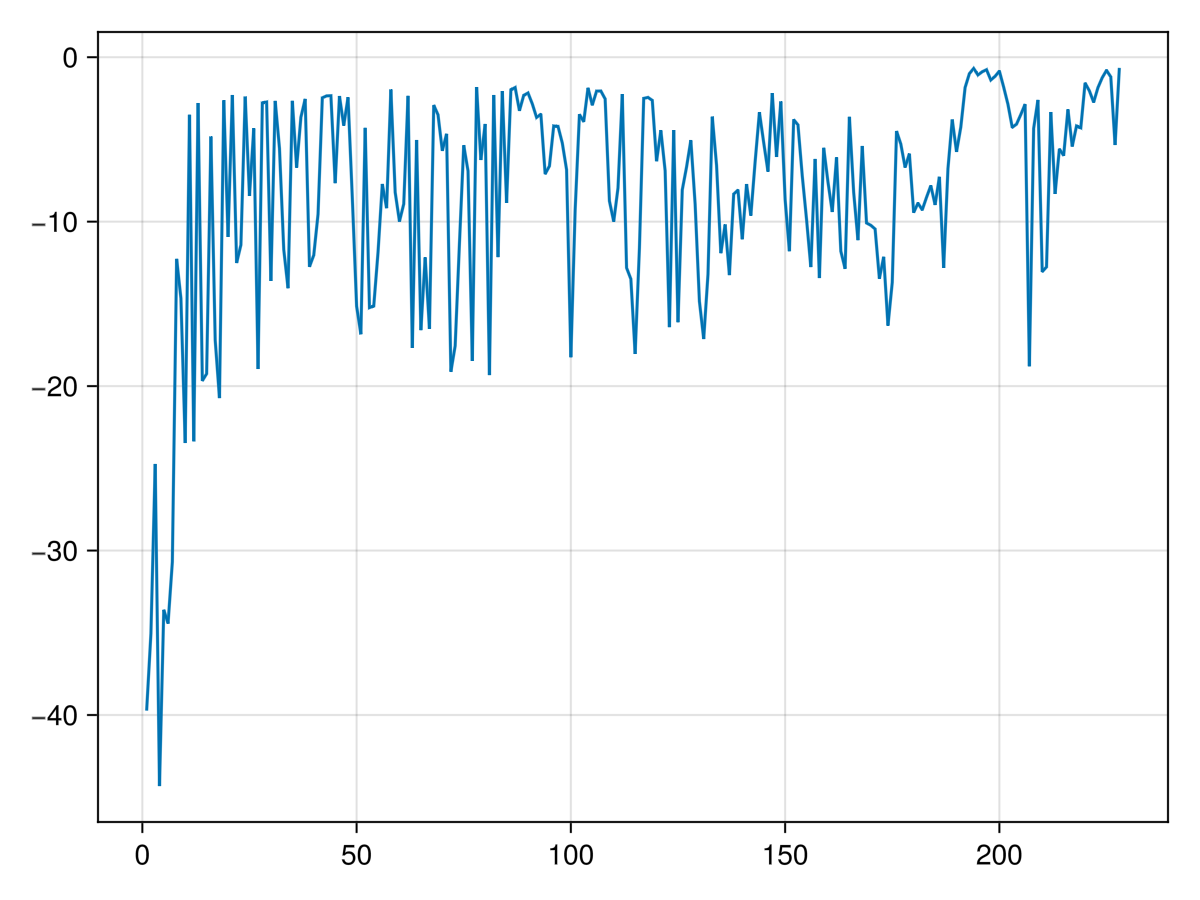

In [5]:
last = 500
last = length(hookResults)
Makie.lines([sum(hookResults[ep].rewards[1:end-1]) / length(hookResults[ep].rewards)  for ep in 1:last])
#ylims!(-70,0)


current_figure()

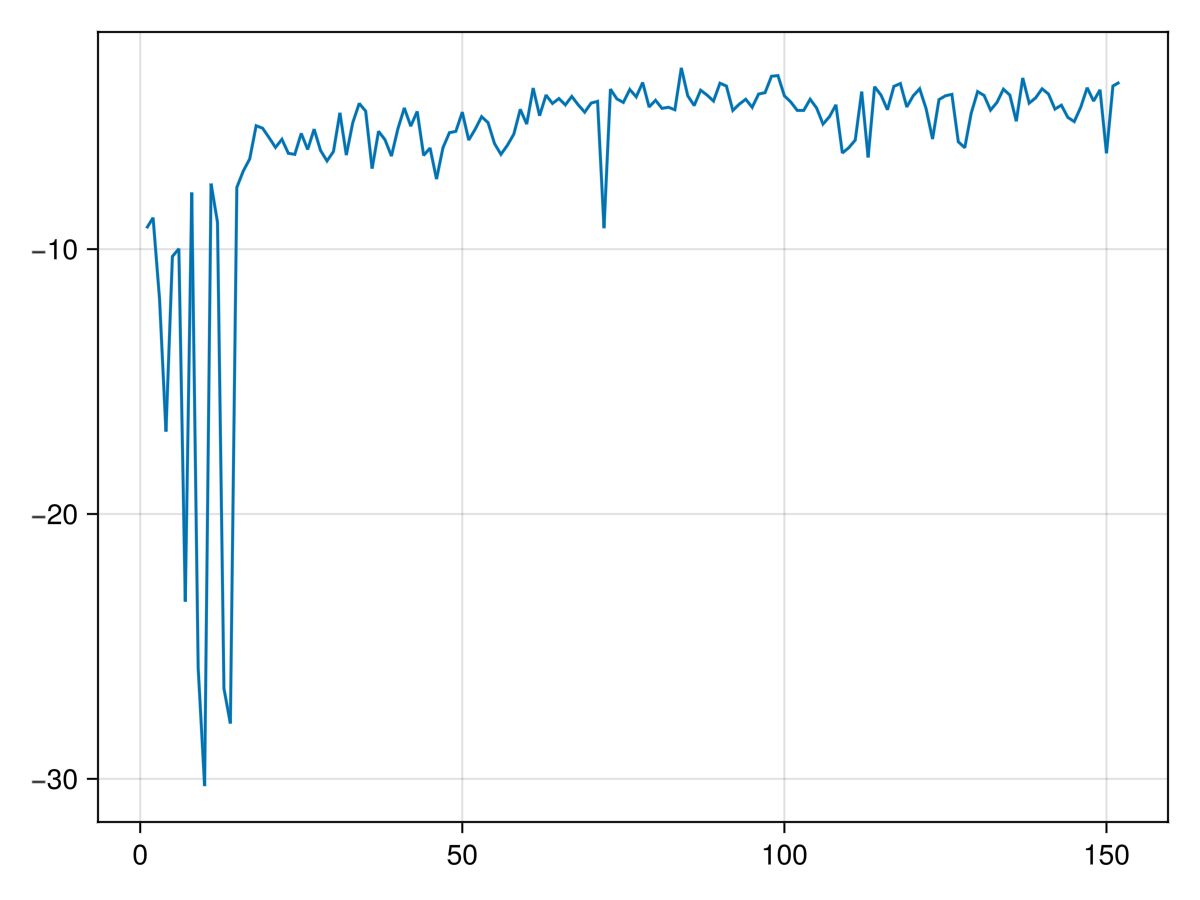

In [122]:
last = 500
last = length(hookResults)
Makie.lines([sum(hookResults[ep].rewards[1:end-1]) / length(hookResults[ep].rewards)  for ep in 1:last])
#ylims!(-70,0)


current_figure()

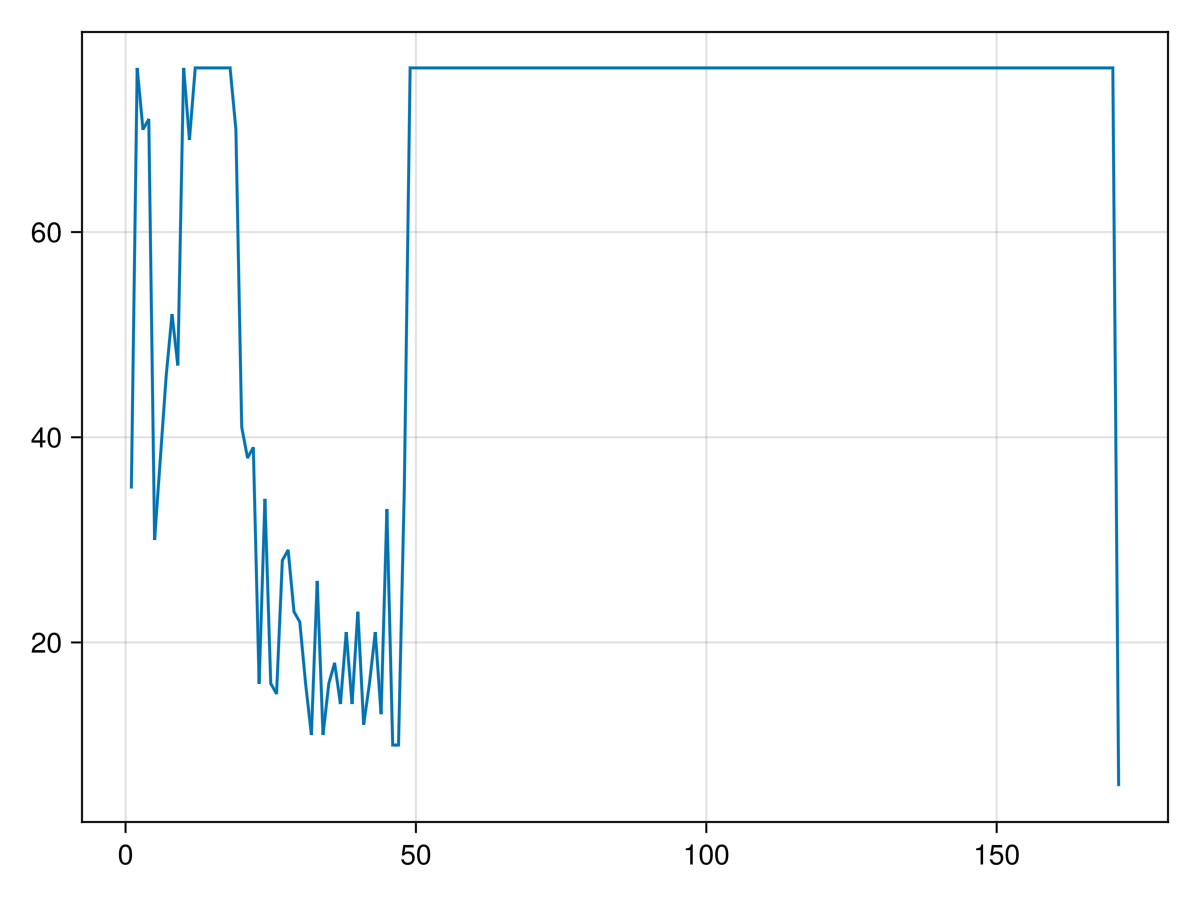

In [128]:
last = 500
last = length(hookResults)
Makie.lines([length(hookResults[ep].rewards)  for ep in 1:last])
#ylims!(-70,0)

In [74]:
seedVec = [10,20,30,40,50]
pathBase = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/Dirs_seed_rel"
dList = []

for seed in seedVec
    pathName = pathBase * "/seed_" * string(seed) * "/" 

    @suppress_err d = load(pathName * "SavedData.jld2")
    #d = load(pathName * "SavedData.jld2")
    push!(dList, d)
end

#hookResults = ex.hook.episodeList;


In [19]:
function GetRewardTrajectory(d)
    ex = d["ex"]
    hookResults = ex.hook.episodeList
    rewList = []
    for ep in 1:length(hookResults)
        push!(rewList, hookResults[ep].rewards)
    end
    return rewList
end

function GetPlusOrientationTrajectory(d)
    ex = d["ex"]
    orList = []
    hookResults = ex.hook.episodeList
    for ep in 1:length(hookResults)
        epOrs = []
        for t in 1:(length(hookResults[ep].agentHandlerList))
            if length(hookResults[ep].agentHandlerList[t].PlusDefects) == 1
                push!(epOrs, hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation)
            end
        end
        push!(orList, epOrs)
    end
    return orList
end

function GetBehaviorPolicy(d)
    ex = d["ex"]
    return ex.policy.policy.behavior_actor.model
end
        
# orList = GetPlusOrientationTrajectory(exList[1])
# pol = GetBehaviorPolicy(exList[1])


GetBehaviorPolicy (generic function with 1 method)

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/gG38B/src/scenes.jl:227


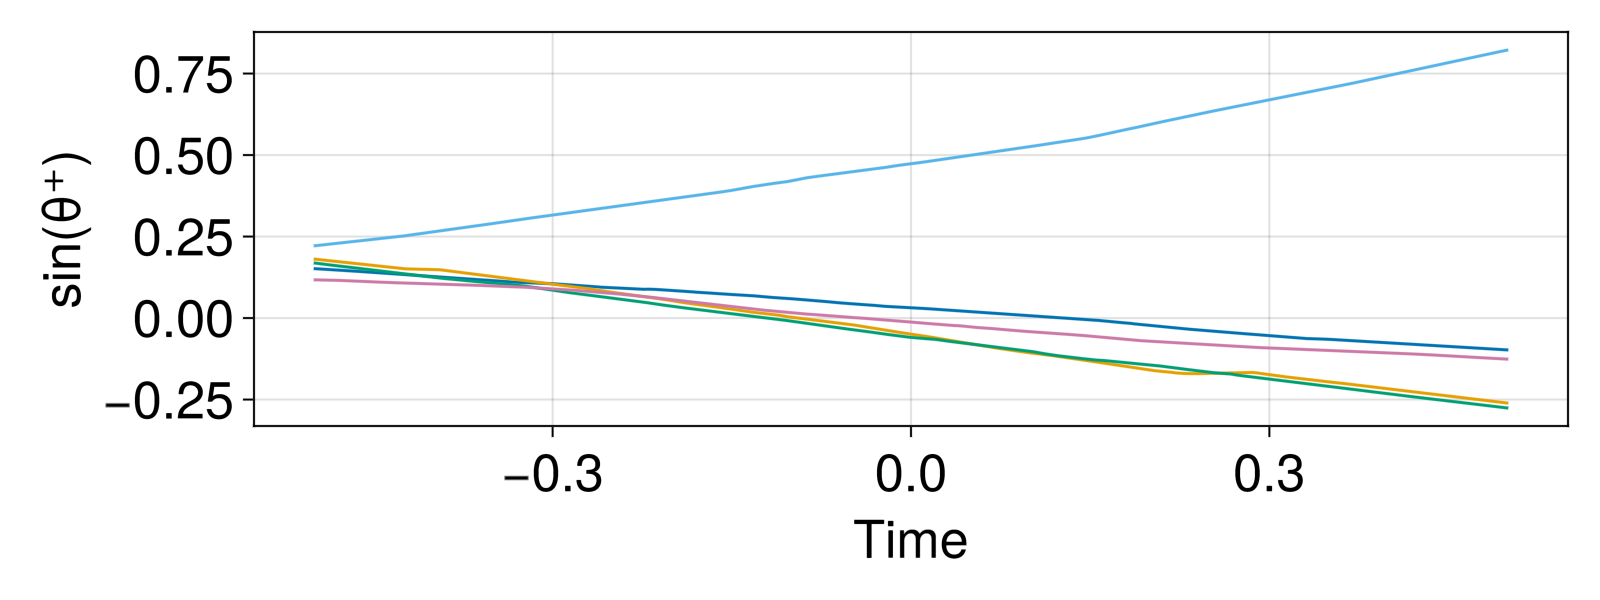

In [72]:
f = Figure(resolution = (800, 300), fontsize = 26, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "sin(θ⁺)"
    )

ps = collect(-0.5:0.001:0.5)
for ex in exList
    pol = GetBehaviorPolicy(ex)
    behaviorActions = []
    for p in ps
        behaviorAction = pol([p])[1]
        push!(behaviorActions, behaviorAction)
    end
    Makie.lines!(ps, Vector{Float64}(behaviorActions))
end

current_figure()

In [16]:
pathBaseOut = "/Users/csfloyd/Dropbox/Projects/RLNematic/Dirs/AnalyzedData/"
pathNameOut = pathBaseOut * "seedExs.jld2" 

save(pathNameOut, "exList", exList)

In [12]:
function UnpackArrayList(arrayList)
    array = []
    for n in 1:length(arrayList)
        array = vcat(array, arrayList[n])
    end 
    return array
end

function RepeatList(list, n)
    retList = []
    for t in 1:length(list)
        for k in 1:n
            push!(retList, list[t])
        end 
    end 
    return retList
end

function GetStateArrays(ex, epNum)
    nt = length(ex.hook.stateTrajList[epNum])
    velocityArray = [deepcopy(ex.hook.stateTrajList[epNum][t].velocitySoA) for t in 1:nt]
    nematicArray = [deepcopy(ex.hook.stateTrajList[epNum][t].nematicSoA) for t in 1:nt]
    activityArray = [deepcopy(ex.hook.stateTrajList[epNum][t].activityField) for t in 1:nt]
    agentHandlerArray = [deepcopy(ex.hook.stateTrajList[epNum][t].agentHandler) for t in 1:nt]
    return (velocityArray, nematicArray, activityArray, agentHandlerArray)
end

function ConcatenateEpisodes(ex, epRange, nRep)
    velocityArrayList = []
    nematicArrayList = []
    activityArrayList = []
    agentHandlerArrayList = []
    for epNum in epRange
        (velocityArray, nematicArray, activityArray, agentHandlerArray) = GetStateArrays(ex, epNum)
        push!(velocityArrayList, velocityArray)
        push!(nematicArrayList, nematicArray)
        push!(activityArrayList, activityArray)
        push!(agentHandlerArrayList, agentHandlerArray)
    end 
    velocityArrayList = RepeatList(UnpackArrayList(velocityArrayList), nRep)
    nematicArrayList = RepeatList(UnpackArrayList(nematicArrayList), nRep)
    activityArrayList = RepeatList(UnpackArrayList(activityArrayList), nRep)
    agentHandlerArrayList = RepeatList(UnpackArrayList(agentHandlerArrayList), nRep)
    
    return (velocityArrayList, nematicArrayList, activityArrayList, agentHandlerArrayList)
end
    
FVF(vec) = Vector{Float64}(vec)

FVF (generic function with 1 method)

In [6]:
length(ex.hook.stateTrajList)

34

In [13]:
using CairoMakie
x = 10.0.^(1:0.1:4)
y = 1.0:0.1:5.0
z = broadcast((x, y) -> x - 10, x, y')

scale = ReversibleScale(x -> asinh(x / 2) / log(10), x -> 2sinh(log(10) * x))
fig, ax, hm = heatmap(x, y, z; colorscale = scale, axis = (; xscale = scale))
Colorbar(fig[1, 2], hm)

fig

LoadError: UndefVarError: `ReversibleScale` not defined

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/scenes.jl:220


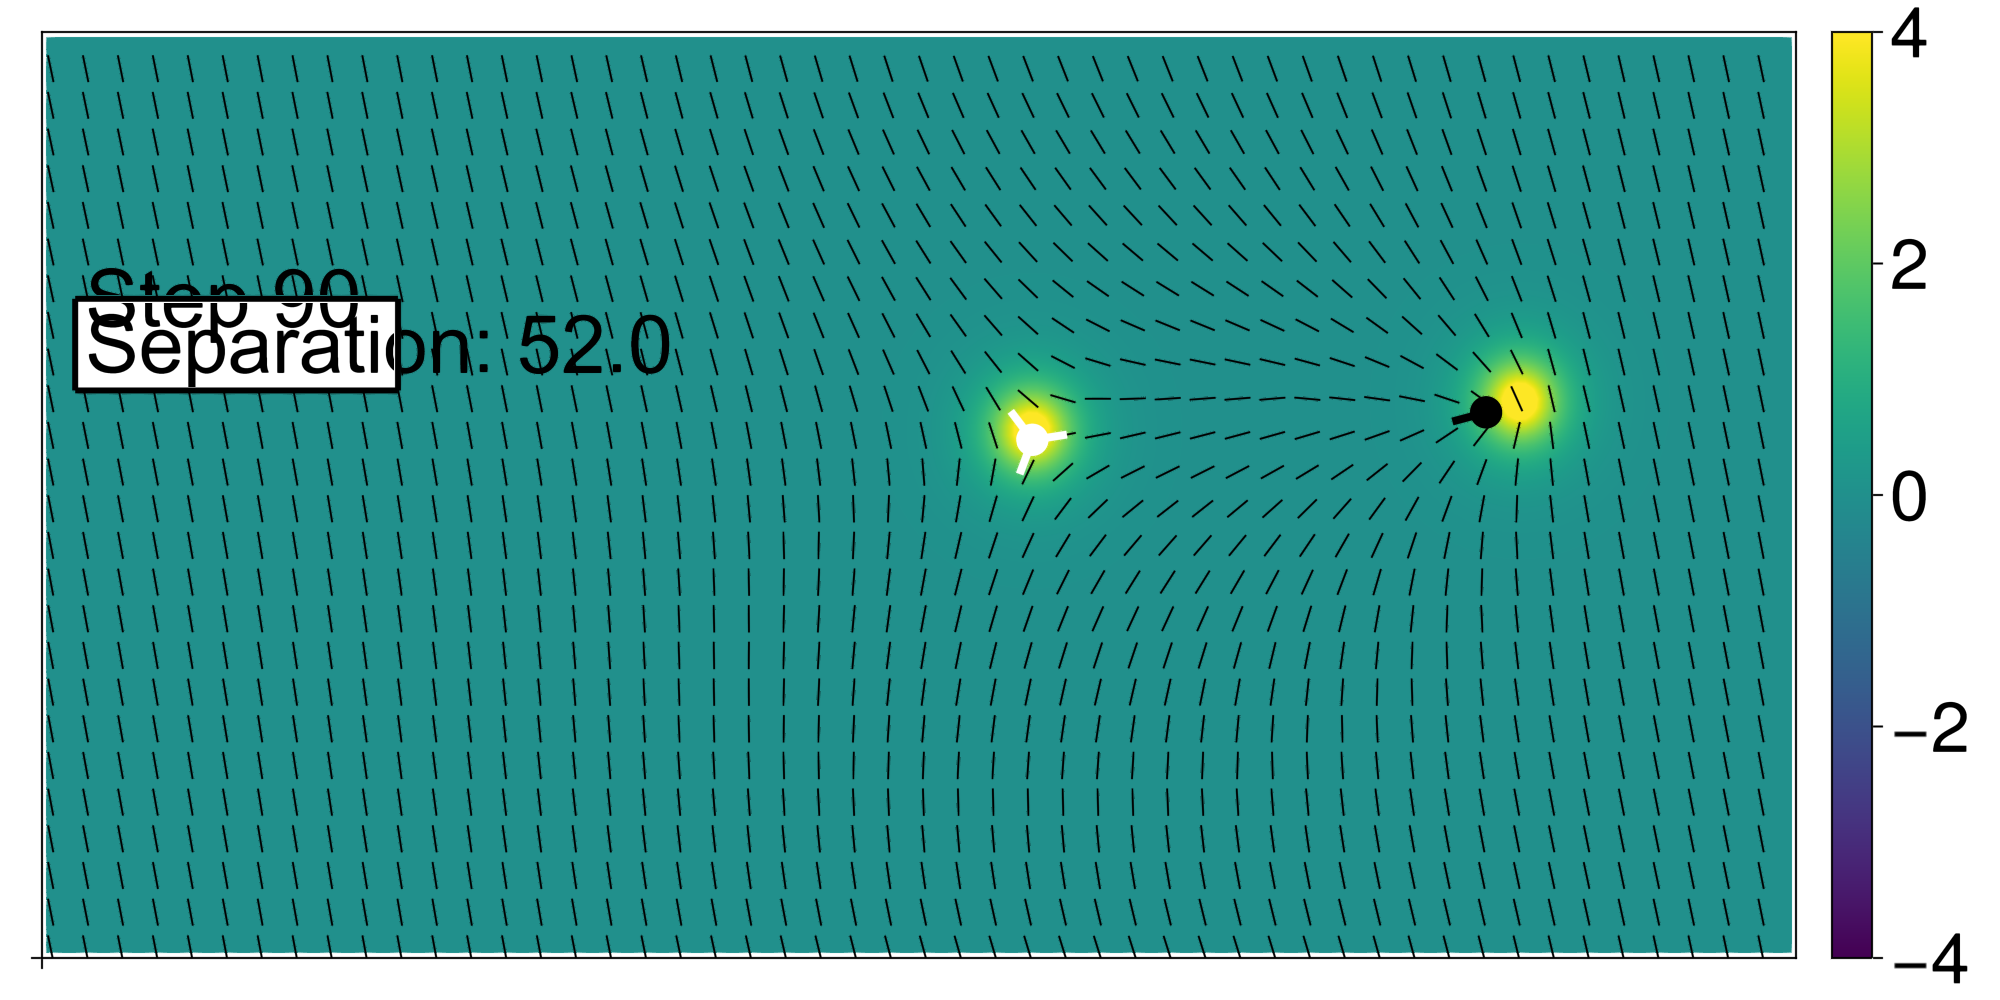

┌ Warning: Unsupported marker: square, using ● instead. Available options can be printed with available_marker_symbols()
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/conversions.jl:1686
┌ Warning: Unsupported marker: square, using ● instead. Available options can be printed with available_marker_symbols()
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/conversions.jl:1686


In [31]:
exc = 4
#exc = 1e-3
cr = (-exc, exc)

parameters["dx"] = 1
parameters["bcBE_X"] = "pbc"
parameters["bcBE_Y"] = "pbc"
parameters["bcLB_mX"] = "pbc"
parameters["bcLB_mY"] = "pbc"
epNum = 4
t = 90

#agentHandler = deepcopy(hookResults[epNum].agentHandlerList[t])
(velocityArray, nematicArray, activityArray, agentHandlerArray) = GetStateArrays(ex, epNum)
imagePath = ""
Visualization.StaticArrows(t, parameters,  velocityArray, nematicArray, activityArray, agentHandlerArray;
        tracker = true,
        arrows = "nem", defects = "Q", col = "act", arrowFac = 3e0, arrowSkip = 4, arrowHead = 0, markersize = 30, 
        colorrange = cr, recording = false, imagePath = imagePath, res = 1000, ar = 1/2, cScaleFac = 1, cwidth = 20)

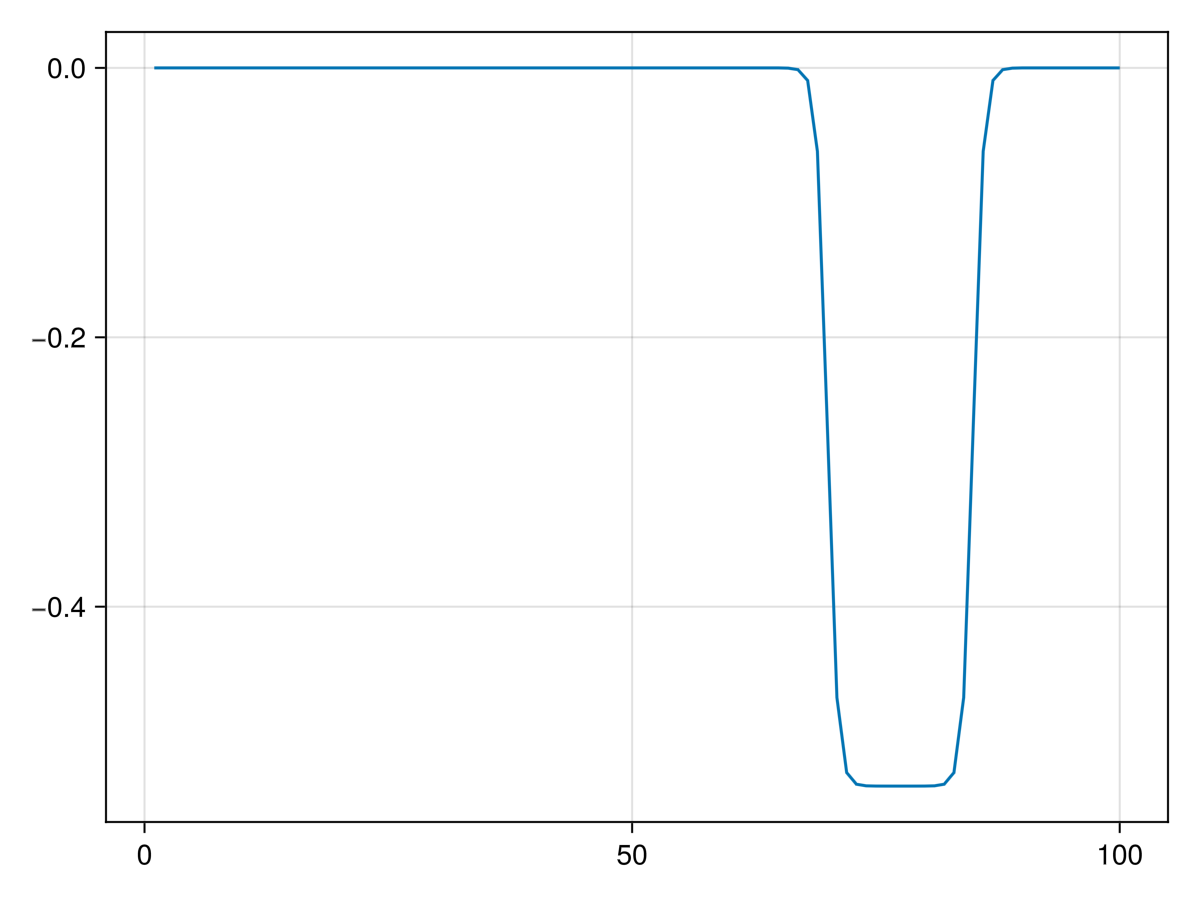

In [97]:
Makie.lines(activityArray[5].Values[1:end,50] )

In [25]:
epNum = 4
t = 1

#agentHandler = deepcopy(hookResults[epNum].agentHandlerList[t])
(velocityArray, nematicArray, activityArray, agentHandlerArray) = GetStateArrays(ex, epNum)

stateList = []
for aH in agentHandlerArray
    rpm = pmVec(aH)
    sR = sqrt(rpm[1]^2 + rpm[2]^2)
    if (length(aH.PlusDefects) == 1) && (length(aH.MinusDefects) == 1)
        if aH.MinusDefects[1].Position[1] > aH.PlusDefects[1].Position[1]
            sR = 100 - sR
            #sR = sR
        end
    end
    sS = 2 * (sR - 50) / (25)
    push!(stateList, sS)
end

pn = FVF(stateList)
Makie.lines(FVF(stateList))
#Makie.lines!(pn)
current_figure()

LoadError: UndefVarError: `GetStateArrays` not defined

In [33]:
ahArray

Main.SimMain.Training.AgentHandler(Any[Main.SimMain.Training.DefectAgent(true, "P1", Real[74.5, 50.5], 6.781061171747444e-8, "quad", Main.SimMain.Training.ActivityCoefficientsQuad(78.5, 50.5, 4.0, 0.0, 0.0, 0, 0, 0.0, 5.0, 1.0, "quad"))], Any[Main.SimMain.Training.DefectAgent(false, "M1", Real[23.5, 50.5], 1.0471975511965976, "quad", Main.SimMain.Training.ActivityCoefficientsQuad(22.5, 50.5, 0.0, 0.0, 0.0, 0, 0, 0.0, 1.0, 5.0, "quad"))], 1, 1, "quad")

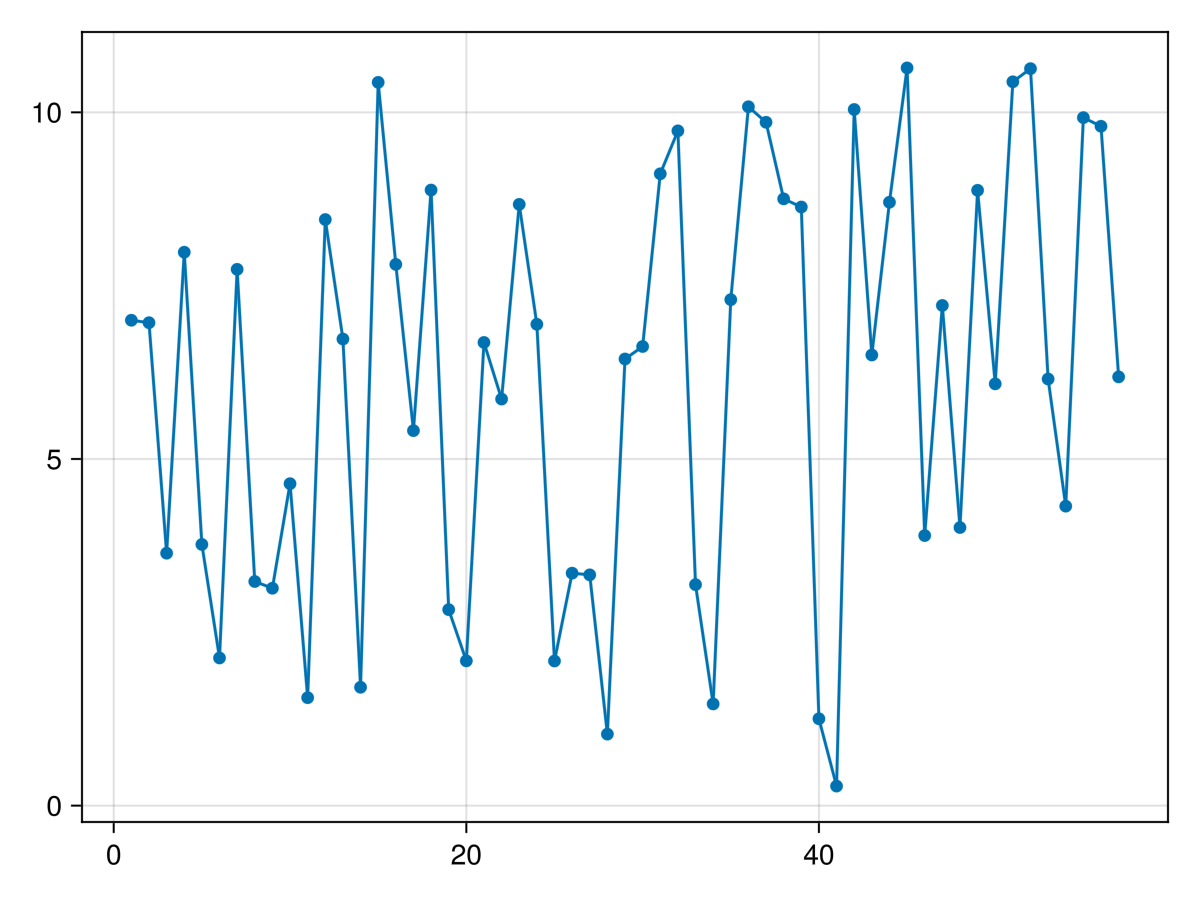

In [6]:
epNum = 1
t = 1

#agentHandler = deepcopy(hookResults[epNum].agentHandlerList[t])
(velocityArray, nematicArray, activityArray, agentHandlerArray) = GetStateArrays(ex, epNum)

Makie.scatter([activityArray[t].Values[argmax(abs.(activityArray[t].Values))] for t in 1:length(activityArray)])
Makie.lines!([activityArray[t].Values[argmax(abs.(activityArray[t].Values))] for t in 1:length(activityArray)])
current_figure()

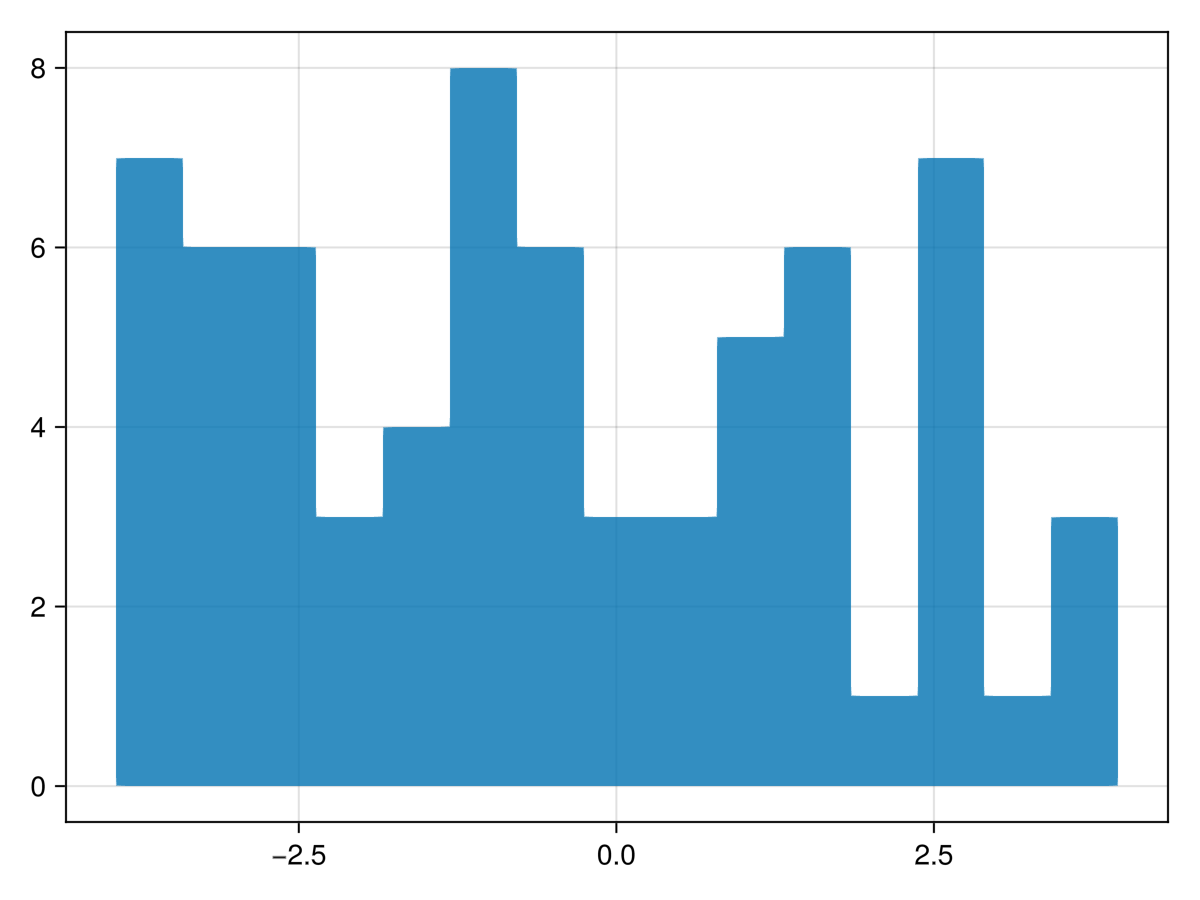

In [102]:
epNum = 1
t = 1

#agentHandler = deepcopy(hookResults[epNum].agentHandlerList[t])
(velocityArray, nematicArray, activityArray, agentHandlerArray) = GetStateArrays(ex, epNum)
Makie.hist([activityArray[t].Values[argmax(abs.(activityArray[t].Values))] for t in 1:length(activityArray)])

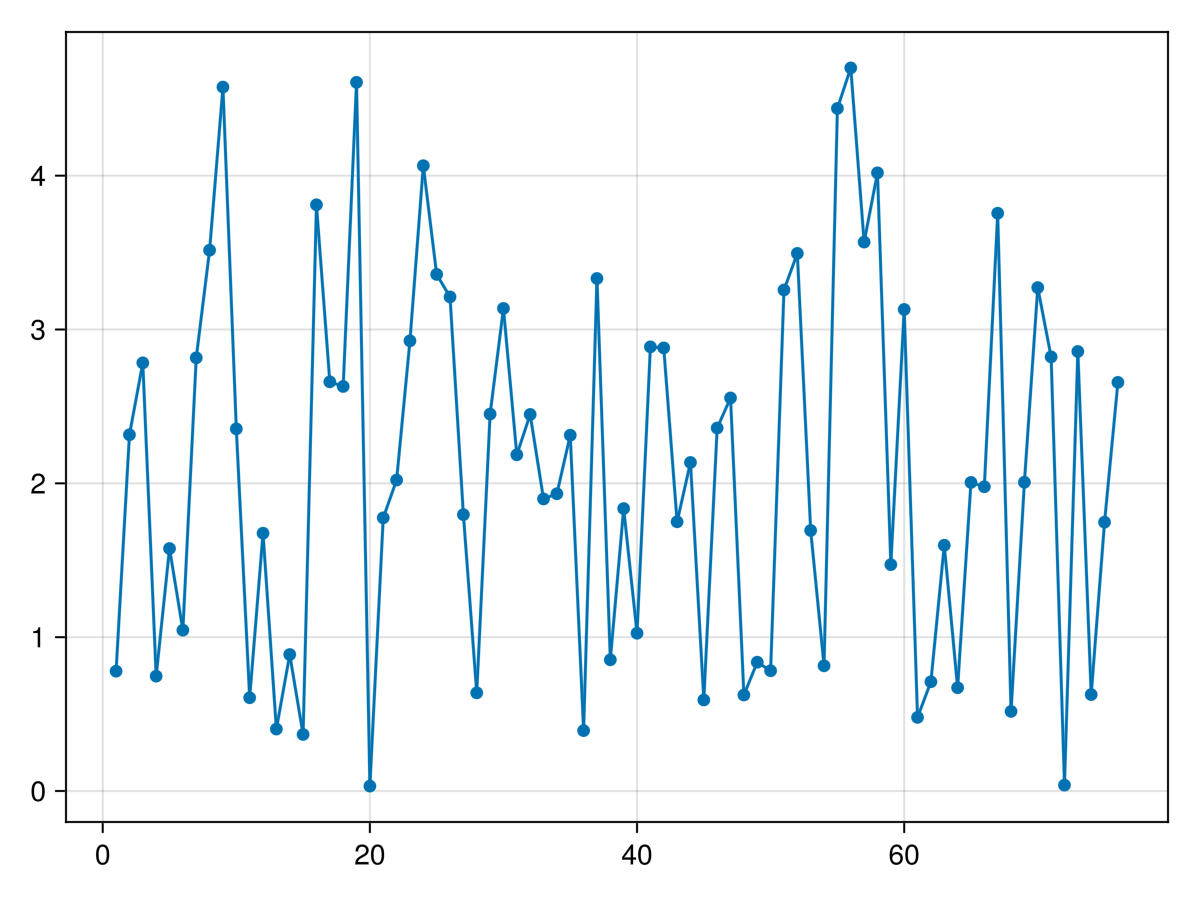

In [106]:
Makie.scatter([maximum(maximum(abs.(activityArray[t].Values))) for t in 1:length(activityArray)])
Makie.lines!([maximum(maximum(abs.(activityArray[t].Values))) for t in 1:length(activityArray)])
#Makie.ylims!(-12,0)
current_figure()

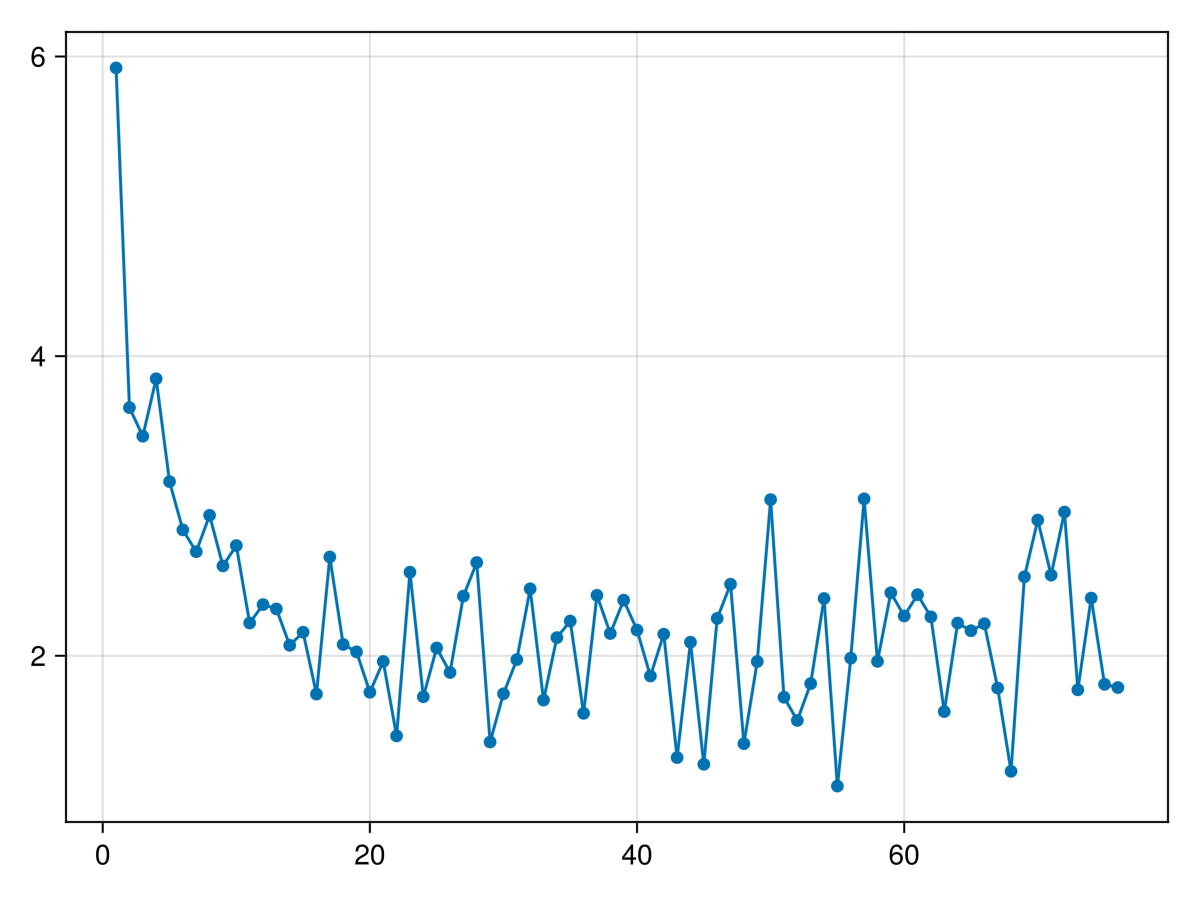

In [39]:
Makie.scatter([maximum(maximum(abs.(activityArray[t].Values))) for t in 1:length(activityArray)])
Makie.lines!([maximum(maximum(abs.(activityArray[t].Values))) for t in 1:length(activityArray)])
#Makie.ylims!(-12,0)
current_figure()

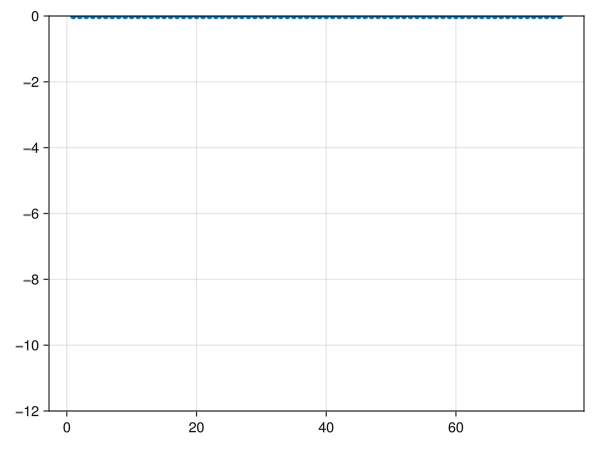

In [24]:
Makie.scatter([minimum(minimum(activityArray[t].Values)) for t in 1:length(activityArray)])
Makie.lines!([minimum(minimum(activityArray[t].Values)) for t in 1:length(activityArray)])
Makie.ylims!(-12,0)
current_figure()

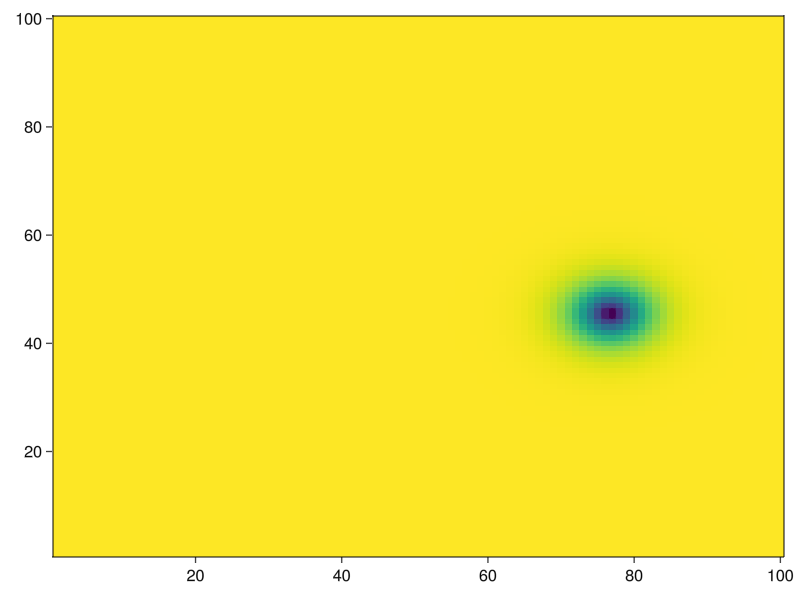

In [91]:
Makie.heatmap(activityArray[9].Values)

In [79]:
parameters["bounds"]

1-element Vector{Float64}:
 1.5707963267948966

In [14]:
epRange = 3:4
nRep = 2 
(velocityArrayList, nematicArrayList, activityArrayList, agentHandlerArrayList) = ConcatenateEpisodes(ex, epRange, nRep)

epLength = Int(floor(length(velocityArrayList) / length(collect(epRange))))

t = 1 
exc = 4
cr = (-exc, exc)

moviePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Movies/newone22.mp4"

parameters["dx"] = 1 
parameters["bcBE_X"] = "pbc" 
parameters["bcBE_Y"] = "pbc"

Visualization.AnimateTrajectoryArrows(parameters, velocityArrayList, nematicArrayList, activityArrayList, 
    agentHandlerArrayList; episodeStride = epLength, tracker = true, 
    arrows = "nem", defects = "Q", col = "act", arrowFac = 4e0, arrowSkip = 4, arrowHead = 0, 
    markersize = 20, colorrange = cr, recording = true, moviePath = moviePath, res = 1000, ar = 2, cScaleFac = 1)


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/scenes.jl:220


LoadError: type Array has no field val

In [15]:
sum([1, 2, 3] .* [1, 2, 3])

14

In [7]:
function GetPsiOmegaNearPlusDefect(env)
    (OmegaSoA, PsiSoA) = MathFunctions.OmegaPsi2DSoA(env.sP.grid, env.sS.velocitySoA, env.sP.bcBE_X, env.sP.bcBE_Y)
    indPlus = Int.(floor.(env.sS.agentHandler.PlusDefects[1].Position))
    
    avOmega = 0.0
    nx = env.sP.grid.Nx 
    ny = env.sP.grid.Ny
    for ip = 0:1, jp = 0:1
        avOmega += OmegaSoA.XYValues[mod1(indPlus[1] + ip, nx), mod1(indPlus[2] + jp, ny)] / 4
    end

    avPsi= 0.0
    for ip = 0:1, jp = 0:1
        avPsi += PsiSoA.XYValues[mod1(indPlus[1] + ip, nx), mod1(indPlus[2] + jp, ny)] / 4
    end
    
    return (avOmega, avPsi)
end

myGrid = Grid2D(100,100,1)
(OmegaSoA, PsiSoA) = OmegaPsi2DSoA(myGrid, velocityArrayList[end], "pbc", "pbc")
maximum(OmegaSoA.XYValues) * 1e0

LoadError: UndefVarError: `velocityArrayList` not defined

LoadError: type ##Main.SimMain.SimState#357 has no field env

In [68]:
moviePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Movies/TeestText40.mp4"

#ep = 350
#agentHandlerList = deepcopy(hookResults[ep].agentHandlerList)

nRep = 3
vizHooks = hookResults[700:5:725]
vizAgentHandlerList = RepeatList(UnpackArrayList([h.agentHandlerList for h in vizHooks]), nRep)

epLength = Int(length(vizAgentHandlerList) / length(vizHooks))

exc = 2.5e-0
Visualization.AnimateAgentHandlerList(parameters,  vizAgentHandlerList;
        episodeStride = epLength,
        colorrange = (-exc, exc), moviePath = moviePath, sleepLength = 0.1, res = 1000, cScaleFac = 1,
        fontsize = 35, ticks = [1], tickLabels = [""], xlabel = "", ylabel = "", clabel = "")

"/Users/csfloyd/Dropbox/Projects/RLNematic/Movies/TeestText40.mp4"

In [23]:
hookResults[100].agentHandlerList[30].MinusDefects[1].Position

2-element Vector{Real}:
 15.5
 25.5

In [5]:
agentHandler = deepcopy(hookResults[1].agentHandlerList[1])

agentHandler.PlusCount

1

In [37]:
[hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] for t in 1:(length(hookResults[ep].agentHandlerList)-1)]

Any[]

abs.(ex.hook.actorLossList)[end] = 33.169254f0
abs.(ex.hook.actorLossList)[end] = 33.169254f0


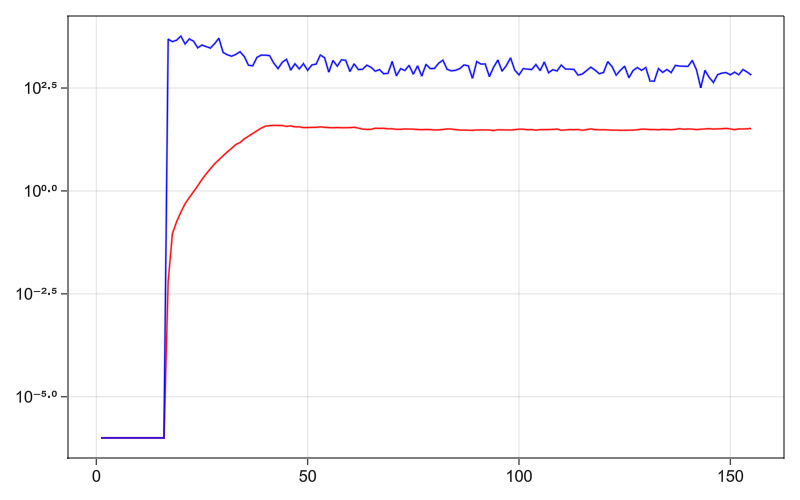

In [5]:
f = Figure(resolution = (800, 500), fontsize = 16, font = "Arial", dpi = 300)
ax = Axis(f[1, 1], yscale = log10)

xs = collect(1:(length(ex.hook.actorLossList)))
Makie.lines!(xs, abs.(ex.hook.actorLossList) .+ 1e-6, color = :red)
Makie.lines!(xs, abs.(ex.hook.criticLossList).+ 1e-6, color = :blue)


@show abs.(ex.hook.actorLossList)[end]
@show abs.(ex.hook.actorLossList)[end]
f

In [6]:
function pmVec(agentHandler) # points from plus to minus
    return agentHandler.MinusDefects[1].Position .- agentHandler.PlusDefects[1].Position
end 

function GetPhi(agentHandler)
    rpm = pmVec(agentHandler)
    rNorm = sqrt(rpm[1]^2 + rpm[2]^2)
    rpm ./= rNorm
    plusOr = agentHandler.PlusDefects[1].Orientation
    ePlus = [cos(plusOr), sin(plusOr)] 
    dot = ePlus[1] * rpm[1] + ePlus[2] * rpm[2]
    phi = acos(clamp(dot, -1, 1))
    return phi
end

GetPhi (generic function with 1 method)

In [92]:
75*50

3750

76
0.002327327747534734
0.003


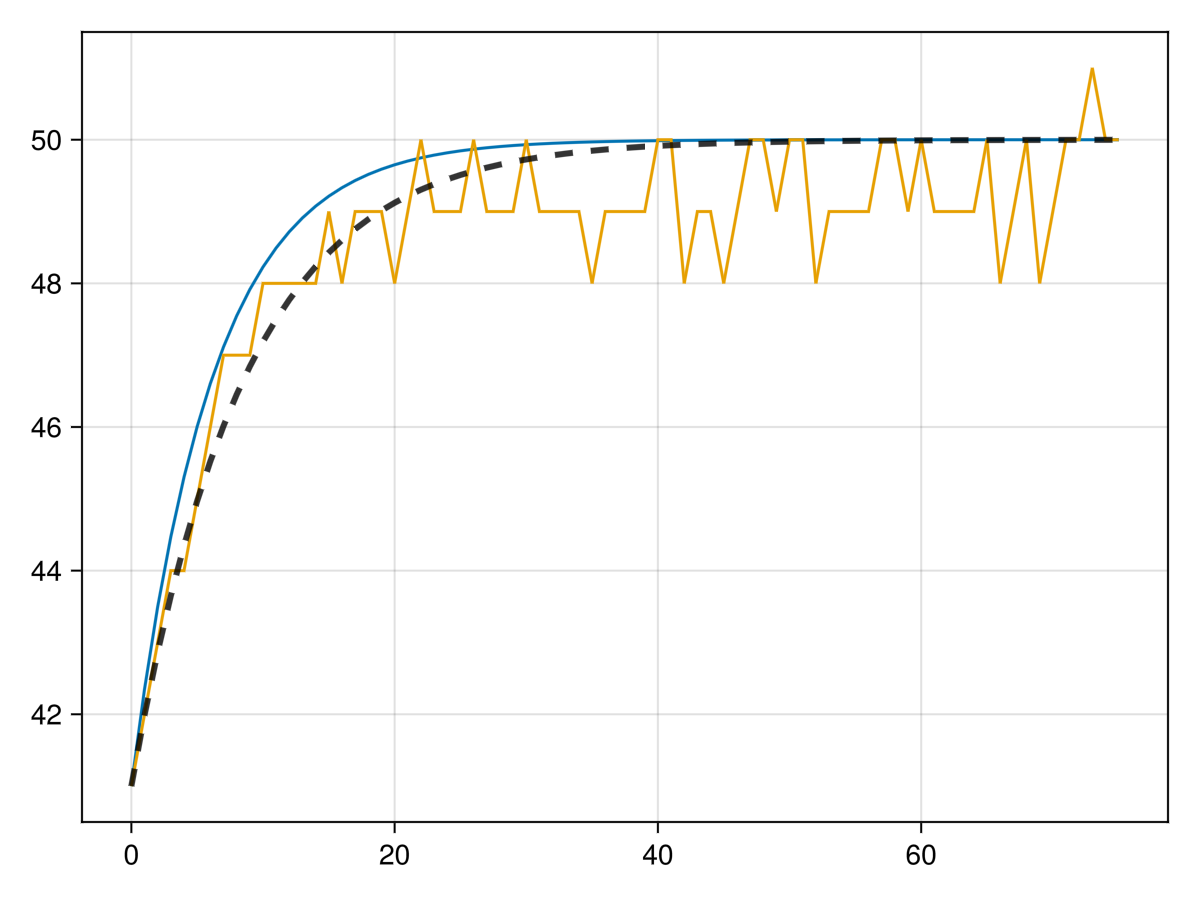

In [110]:
using LsqFit

linFun(t, p) = p[1] .* exp.(-t .* p[2])

function IntegrateForceLaw(s0, parameters, nt)
    s0List = [s0];
    for t = 1:nt-1
#         s0 -= parameters["ndt"] * parameters["ks"] * (s0 - parameters["l0"])
        s0 -= parameters["ndt"] * parameters["ks"] * (s0 - parameters["l0"]) 
        push!(s0List, s0)
    end
    return FVF(s0List)
end

function IntegrateForceLawList(s0ListOrig, parameters, nt)
    s0List = [s0];
    for t = 1:nt-1
        s0 = s0ListOrig[t] - parameters["ndt"] * parameters["ks"] * (s0ListOrig[t] - parameters["l0"])
        push!(s0List, s0)
    end
    return s0List
end

ep = 142
s0 = sin(hookResults[ep].agentHandlerList[1].PlusDefects[1].Orientation)
nt = length(hookResults[ep].agentHandlerList)
#s0ListOrig = [sin(hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation) for t in 1:(length(hookResults[ep].agentHandlerList))]


s0ListOrig = abs.([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1]
            for t in 1:(length(hookResults[ep].agentHandlerList))])
s0 = s0ListOrig[1]

s0List = FVF(IntegrateForceLaw(s0, parameters, nt))

println(nt)
upFit = 50
xVals = collect(0:nt-1)
yVals = s0ListOrig
linFun(t, p) = -(50.0 .- s0) .* exp.((t) .* p[1]) .+ 50.0
fitExp = curve_fit(linFun, xVals[1:upFit], yVals[1:upFit], [1e-2])
println(abs(fitExp.param[1] / parameters["ndt"]))
println(parameters["ks"])
Makie.lines(xVals, s0List)
Makie.lines!(xVals, s0ListOrig)
Makie.lines!(xVals, FVF(linFun(xVals, fitExp.param)), 
    linewidth = 3, color = (:black, 0.8), linestyle = :dash)

#Makie.ylims!(-0.75, 0.75)

current_figure()

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/scenes.jl:220


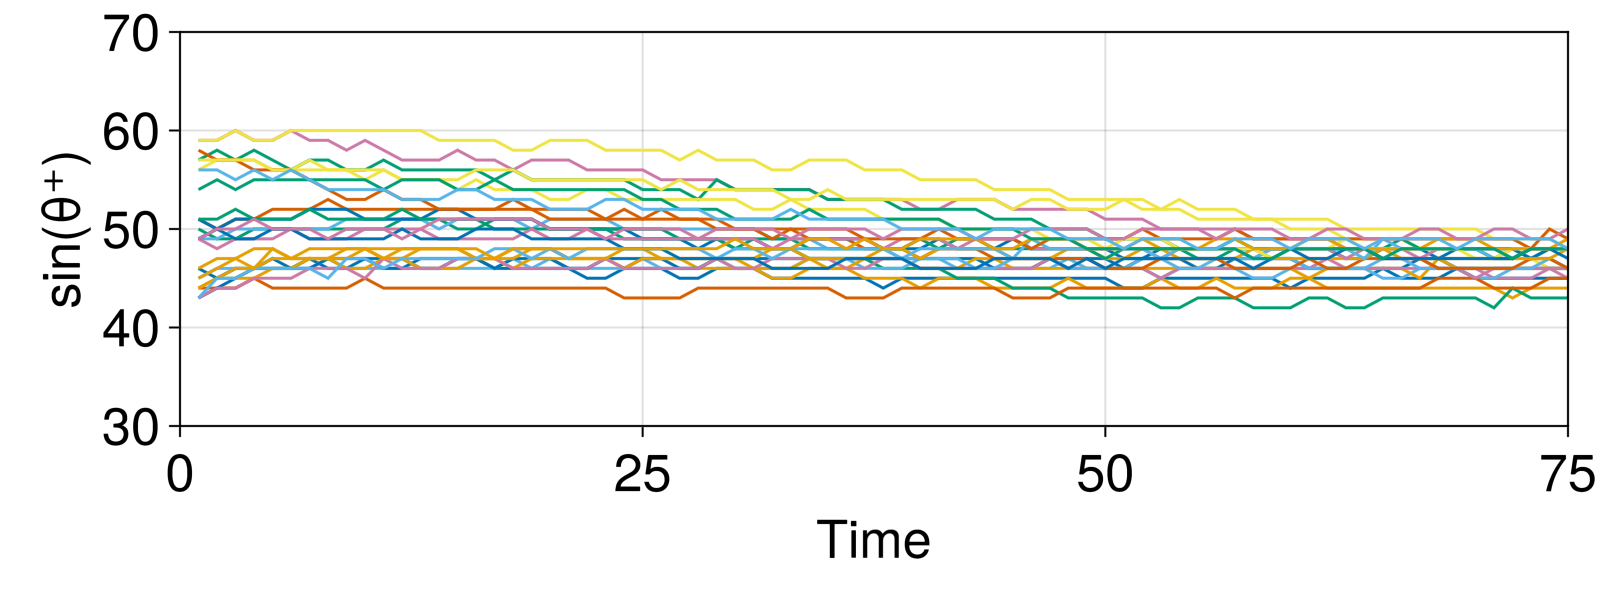

In [8]:
using LsqFit

f = Figure(resolution = (800, 300), fontsize = 26, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "sin(θ⁺)"
    )

ep1 = 25
ep2 = 50

# ep1 = 100 - 00
# ep2 = 150 - 00

upFit = 40

expList = []
colorSet = Makie.wong_colors()
for (i, ep) in enumerate(collect(ep1:ep2))
    colorIndex = i % length(colorSet)
    lineColor = colorSet[colorIndex + 1]
    #s0ListOrig = abs.([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1] for t in 1:(length(hookResults[ep].agentHandlerList))])
    s0ListOrig = []
    
    for t in 1:length(hookResults[ep].agentHandlerList)
        if (length(hookResults[ep].agentHandlerList[t].PlusDefects) == 1) && (length(hookResults[ep].agentHandlerList[t].MinusDefects) == 1)
            push!(s0ListOrig, hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1])
        else
            println(ep)
        end
    end
    #println(length(s0ListOrig))
    s0ListOrig = FVF(abs.(s0ListOrig))
    #println(s0ListOrig)
    nt = length(s0ListOrig)
#     if nt>1
#         s0 = s0ListOrig[1]
#         println(s0)
#         if (abs(s0-50) > 0)  && nt > 5
#         #if nt > 50    
#             xVals = collect(0:nt-1)
#             yVals = s0ListOrig
#             Makie.lines!(xVals, s0ListOrig, color= lineColor)
#             nt = length(hookResults[ep].agentHandlerList)

#     #         linFun(t, p) = -(50.0 .- s0) .* exp.(-(t) .* p[1]) .+ 50.0
#     #         fitExp = curve_fit(linFun, xVals[1:upFit], yVals[1:upFit], [1e-2])
#     #         Makie.lines!(xVals, FVF(linFun(xVals, fitExp.param)), 
#     #             linewidth = 1, color = (lineColor, 0.8), linestyle = :dash)
#     #         push!(expList, fitExp.param[1] / parameters["ndt"])


#         end
#     end
    Makie.lines!(s0ListOrig)

end
Makie.xlims!(0,75)
Makie.ylims!(30, 70)



# figurePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Figures/"
# save(figurePath * "HybridOrientationRandom.png", f, px_per_unit = 3)

current_figure()

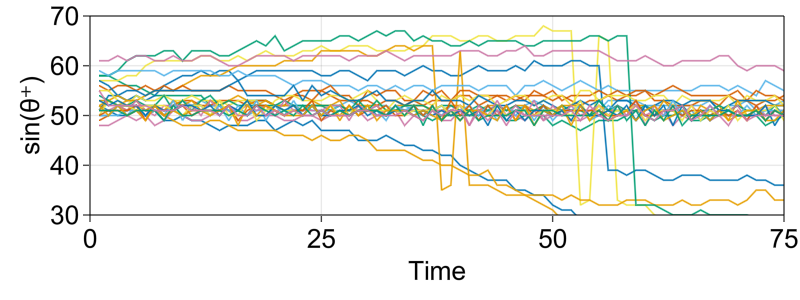

In [18]:
using LsqFit

f = Figure(resolution = (800, 300), fontsize = 26, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "sin(θ⁺)"
    )

ep1 = 1
ep2 = 130

ep1 = 100 - 00
ep2 = 150 - 00

upFit = 40

expList = []

s00List = []
colorSet = Makie.wong_colors()
for (i, ep) in enumerate(collect(ep1:ep2))
    colorIndex = i % length(colorSet)
    lineColor = colorSet[colorIndex + 1]

#     s0ListOrig = FVF(abs.([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1] for t in 1:(length(hookResults[ep].agentHandlerList))]))
#     s0 = abs.(hookResults[ep].agentHandlerList[1].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[1].MinusDefects[1].Position[1])
#     if s0 ==1
#         println(length(hookResults[ep].agentHandlerList[1].PlusDefects))
#         println(length(hookResults[ep].agentHandlerList[1].MinusDefects))
#     end
#     push!(s00List, s0)
    s0ListOrig = []
    
    for t in 1:length(hookResults[ep].agentHandlerList)
        if (length(hookResults[ep].agentHandlerList[t].PlusDefects) == 1) && (length(hookResults[ep].agentHandlerList[t].MinusDefects) == 1)
            push!(s0ListOrig, hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1])
        end
    end
    #println(length(s0ListOrig))
#    s0ListOrig = FVF(abs.(s0ListOrig))
    #println(s0ListOrig)
#    nt = length(s0ListOrig)
#     if nt>1
#         s0 = s0ListOrig[1]
#         println(s0)
#         if (abs(s0-50) > 0)  && nt > 5
#         #if nt > 50    
#             xVals = collect(0:nt-1)
#             yVals = s0ListOrig
#             Makie.lines!(xVals, s0ListOrig, color= lineColor)
#             nt = length(hookResults[ep].agentHandlerList)

#     #         linFun(t, p) = -(50.0 .- s0) .* exp.(-(t) .* p[1]) .+ 50.0
#     #         fitExp = curve_fit(linFun, xVals[1:upFit], yVals[1:upFit], [1e-2])
#     #         Makie.lines!(xVals, FVF(linFun(xVals, fitExp.param)), 
#     #             linewidth = 1, color = (lineColor, 0.8), linestyle = :dash)
#     #         push!(expList, fitExp.param[1] / parameters["ndt"])


#         end
#     end
    if length(s0ListOrig) > 60
        push!(s00List, s0ListOrig[1])
       Makie.lines!(FVF(abs.(s0ListOrig)))
    end

end
Makie.xlims!(0,75)
Makie.ylims!(30, 70)



# figurePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Figures/"
# save(figurePath * "HybridOrientationRandom.png", f, px_per_unit = 3)

current_figure()

In [35]:
s00List

136-element Vector{Any}:
 58.0
 56.0
 63.0
 51.0
 43.0
 43.0
 42.0
 47.0
 47.0
 50.0
 51.0
 55.0
 45.0
  ⋮
 55.0
 56.0
 42.0
 50.0
 48.0
 51.0
 49.0
 49.0
 43.0
 46.0
 51.0
 58.0

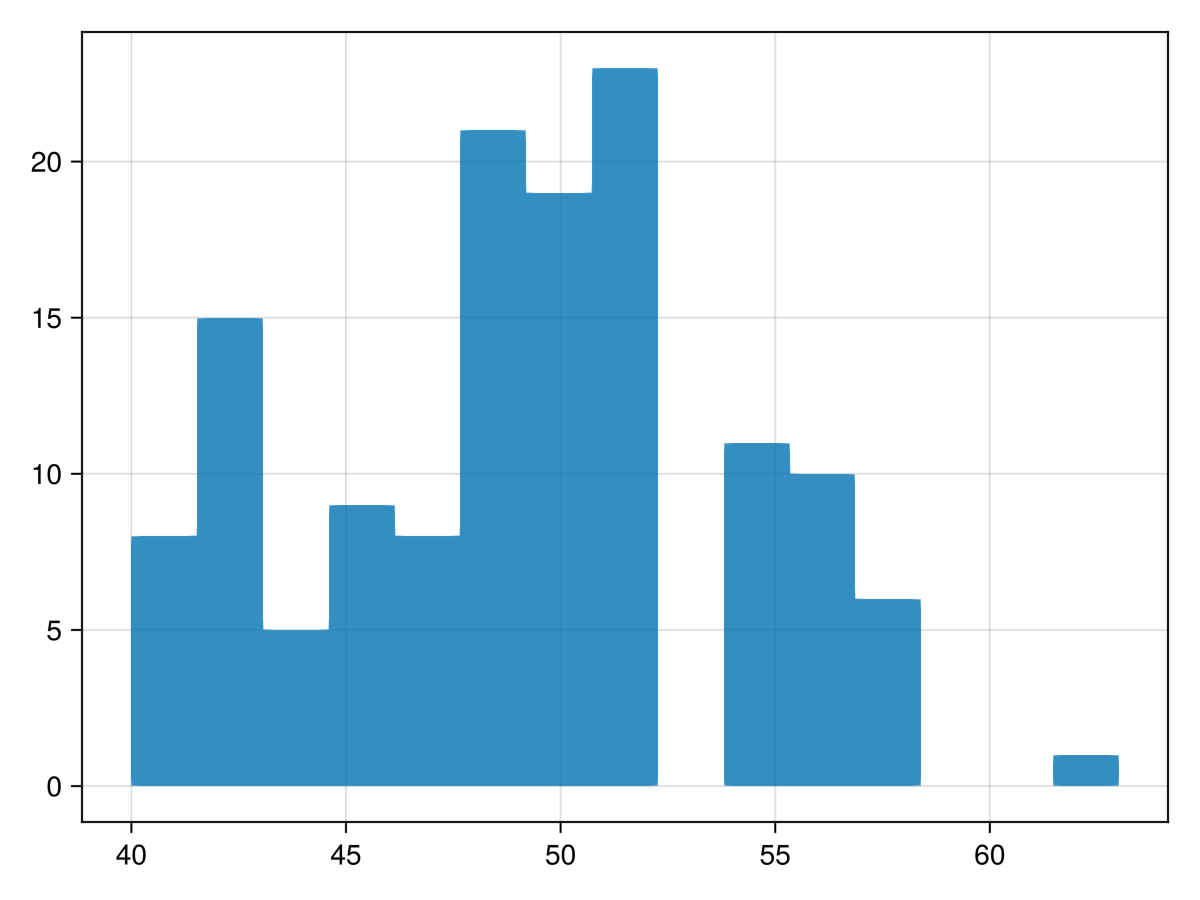

In [37]:
Makie.hist(s00List)
#xlims!(40,60)
current_figure()

In [48]:
@show maximum(s00List)-minimum(s00List)
@show 0.75*50 

maximum(s00List) - minimum(s00List) = 28.0
0.75 * 50 = 37.5


37.5

In [83]:
using LsqFit

f = Figure(resolution = (800, 300), fontsize = 26, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "sin(θ⁺)"
    )

ep1 = 1
ep2 = 20

ep1 = 60 - 00
ep2 = 160 - 00

upFit = 40

expList = []
s00List = []
colorSet = Makie.wong_colors()
for (i, ep) in enumerate(collect(ep1:ep2))
    colorIndex = i % length(colorSet)
    lineColor = colorSet[colorIndex + 1]
    s0ListOrig = abs.([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1] for t in 1:(length(hookResults[ep].agentHandlerList))])
    s0 = s0ListOrig[1]
    push!(s00List, s0)
    nt = length(s0ListOrig)
    if ((s0-50) < 2)  #&& nt > 50
    #if nt > 50    
        xVals = collect(0:nt-1)
        yVals = s0ListOrig
        Makie.lines!(xVals, s0ListOrig, color= lineColor)
        nt = length(hookResults[ep].agentHandlerList)
        
        linFun(t, p) = -(50.0 .- s0) .* exp.(-(t) .* p[1]) .+ 50.0
        fitExp = curve_fit(linFun, xVals[1:upFit], yVals[1:upFit], [1e-2])
        #Makie.lines!(xVals, FVF(linFun(xVals, fitExp.param)), 
        #    linewidth = 1, color = (lineColor, 0.8), linestyle = :dash)
        push!(expList, fitExp.param[1] / parameters["ndt"])


    end

end
Makie.xlims!(0,75)
Makie.ylims!(37.5, 62.5)



# figurePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Figures/"
# save(figurePath * "HybridOrientationRandom.png", f, px_per_unit = 3)

current_figure()

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/scenes.jl:220


LoadError: BoundsError: attempt to access 1-element Vector{Int64} at index [1:40]

In [79]:
using Statistics
Makie.hist(s00List,bins = 30)
@show minimum(s00List)
@show maximum(s00List)
@show mean(s00List)
@show mean(expList)

minimum(s00List) = 40.0
maximum(s00List) = 58.0
mean(s00List) = 50.504950495049506
mean(expList) = 0.0028833689264424122


0.0028833689264424122

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/gG38B/src/scenes.jl:227


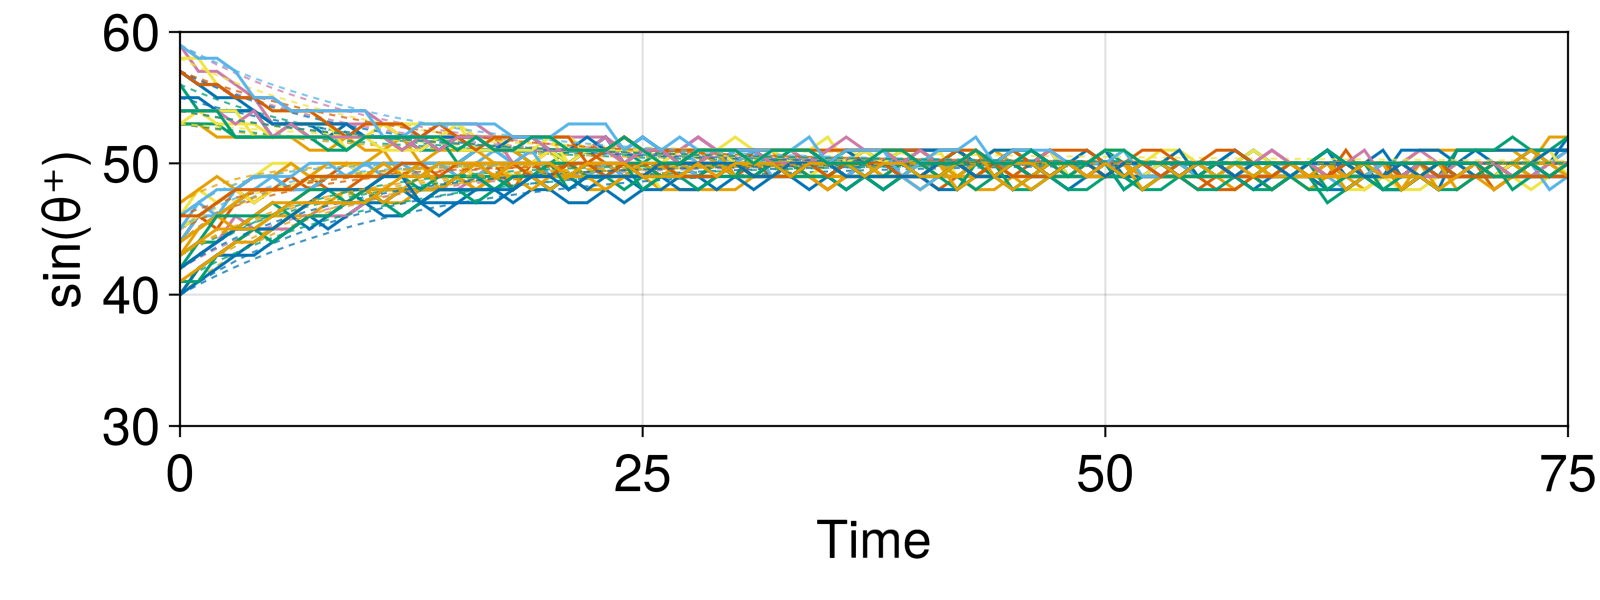

In [114]:
using LsqFit

f = Figure(resolution = (800, 300), fontsize = 26, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "sin(θ⁺)"
    )

ep1 = 1
ep2 = 20

ep1 = 100 - 00
ep2 = 150 - 00

upFit = 40

expList = []
colorSet = Makie.wong_colors()
for (i, ep) in enumerate(collect(ep1:ep2))
    colorIndex = i % length(colorSet)
    lineColor = colorSet[colorIndex + 1]
    s0ListOrig = abs.([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1] for t in 1:(length(hookResults[ep].agentHandlerList))])
    s0 = s0ListOrig[1]
    nt = length(s0ListOrig)
    if (abs(s0-50) > 2)  && nt > 50
    #if nt > 50    
        xVals = collect(0:nt-1)
        yVals = s0ListOrig
        Makie.lines!(xVals, s0ListOrig, color= lineColor)
        nt = length(hookResults[ep].agentHandlerList)
        
        linFun(t, p) = -(50.0 .- s0) .* exp.(-(t) .* p[1]) .+ 50.0
        fitExp = curve_fit(linFun, xVals[1:upFit], yVals[1:upFit], [1e-2])
        Makie.lines!(xVals, FVF(linFun(xVals, fitExp.param)), 
            linewidth = 1, color = (lineColor, 0.8), linestyle = :dash)
        push!(expList, fitExp.param[1] / parameters["ndt"])


    end

end
Makie.xlims!(0,75)
Makie.ylims!(30, 60)



# figurePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Figures/"
# save(figurePath * "HybridOrientationRandom.png", f, px_per_unit = 3)

current_figure()

In [40]:
parameters["seed"]

20

In [116]:
using Statistics
@show mean(expList)
@show median(expList)
@show std(expList)

mean(expList) = 0.002609777128114195
median(expList) = 0.0021005857159086564
std(expList) = 0.0014400087123568948


0.0014400087123568948

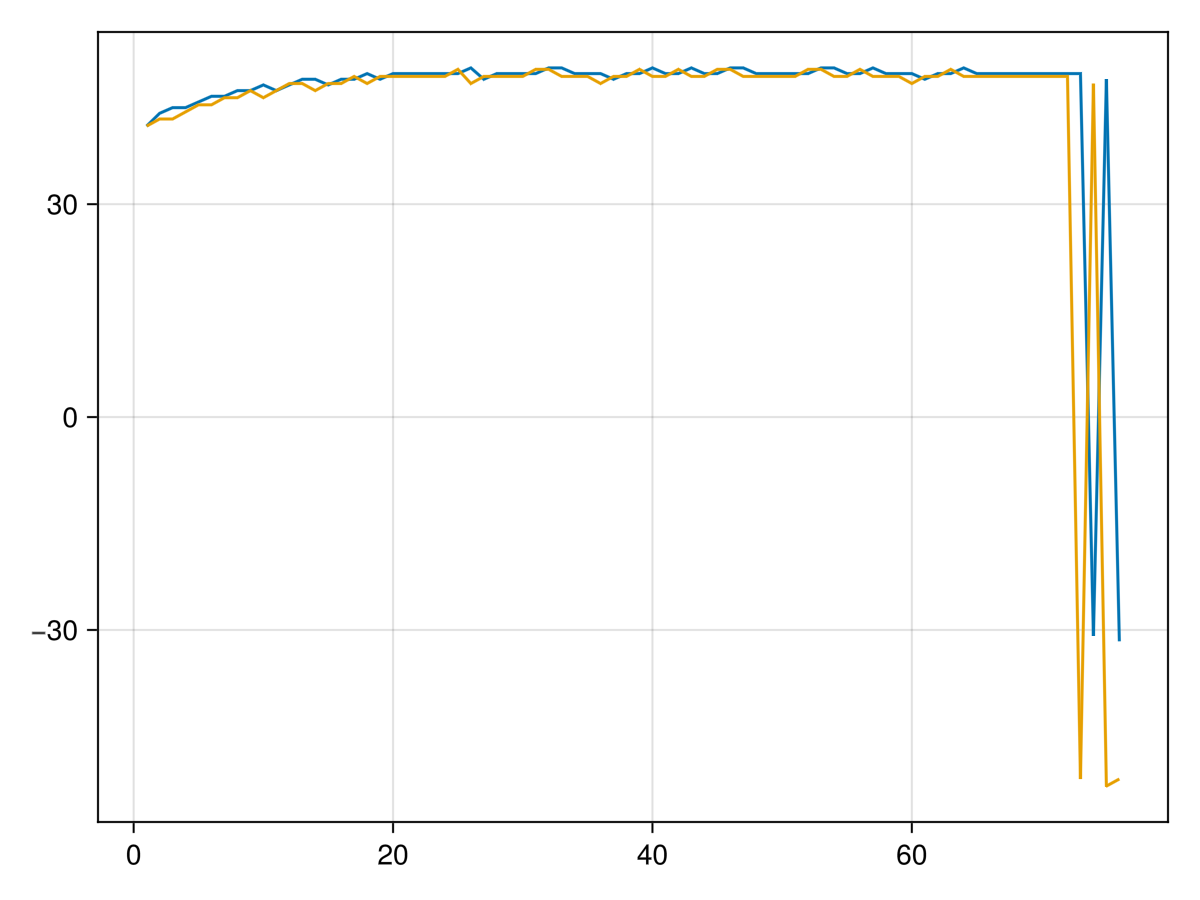

In [67]:
function IntegrateForceLawList(s0ListOrig, parameters, nt)
    s0 = s0ListOrig[1]
    s0List = [s0];
    rewList = [0.0]
    for t = 1:nt-1
        s0 = s0ListOrig[t] - parameters["ndt"] * parameters["ks"] * (s0ListOrig[t] - parameters["l0"])
        push!(s0List, s0)
        push!(rewList, -10 * abs(s0 - s0ListOrig[t+1]))
    end
    return [FVF(s0List), FVF(rewList)]
end



ep = 140
s0ListOrig = FVF([sin(hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation)  for t in 1:(length(hookResults[ep].agentHandlerList))])
s0ListOrig = [hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1]
            for t in 1:(length(hookResults[ep].agentHandlerList))]

nt = length(s0ListOrig)
(s0List, rewList) = IntegrateForceLawList(s0ListOrig, parameters, nt)
Makie.lines(s0List)
Makie.lines!(s0ListOrig)
current_figure()


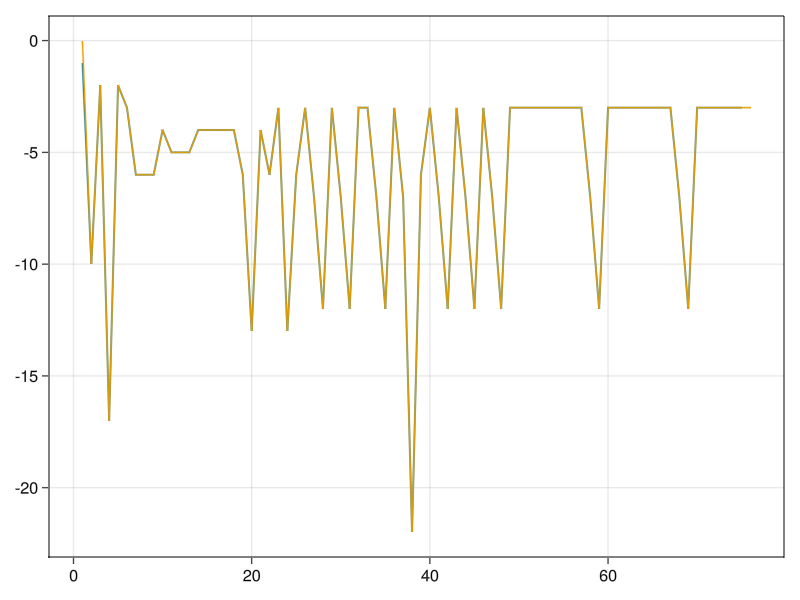

In [22]:
Makie.lines(hookResults[ep].rewards[1:end-1])#/parameters["ks"])
Makie.lines!(rewList)#/parameters["ks"])
current_figure()

In [60]:
using LsqFit

f = Figure(resolution = (800, 300), fontsize = 26, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "sin(θ⁺)"
    )

ep1 = 1
ep2 = 20

ep1 = 120 - 50
ep2 = 150 - 50

expList = []
colorSet = Makie.wong_colors()
for (i, ep) in enumerate(collect(ep1:ep2))
    colorIndex = i % length(colorSet)
    lineColor = colorSet[colorIndex + 1]
    s0ListOrig = [sin(hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation)  for t in 1:(length(hookResults[ep].agentHandlerList)-1)]#[1:75]
    if abs(s0ListOrig[1]) > 0.15
        
        xVals = collect(1:length(s0ListOrig))
        #Makie.lines!([sin(hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation)  for t in 1:(length(hookResults[ep].agentHandlerList)-1)])# , color = :black)
        Makie.lines!(xVals, s0ListOrig, color= lineColor)
        yVals = s0ListOrig
        linFun(t, p) = yVals[1] *  exp.(-t .* p[1])
        fitExp = curve_fit(linFun, xVals, yVals, [1.0, 1e-1])
        Makie.lines!(xVals, FVF(linFun(xVals, fitExp.param)), 
            linewidth = 1, color = (lineColor, 0.8), linestyle = :dash)
        if abs(fitExp.param[1] / parameters["ndt"]) < 0.01

            push!(expList, fitExp.param[1] / parameters["ndt"])

        end
    end

end
Makie.xlims!(0,75)
Makie.ylims!(-0.7, 0.7)



# figurePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Figures/"
# save(figurePath * "HybridOrientationRandom.png", f, px_per_unit = 3)

current_figure()

LoadError: BoundsError: attempt to access 0-element Vector{Any} at index [1]

In [52]:
using Statistics
println(mean(expList))
println(std(expList))

0.0004837171273420807
0.0002582207447372392


┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/scenes.jl:220


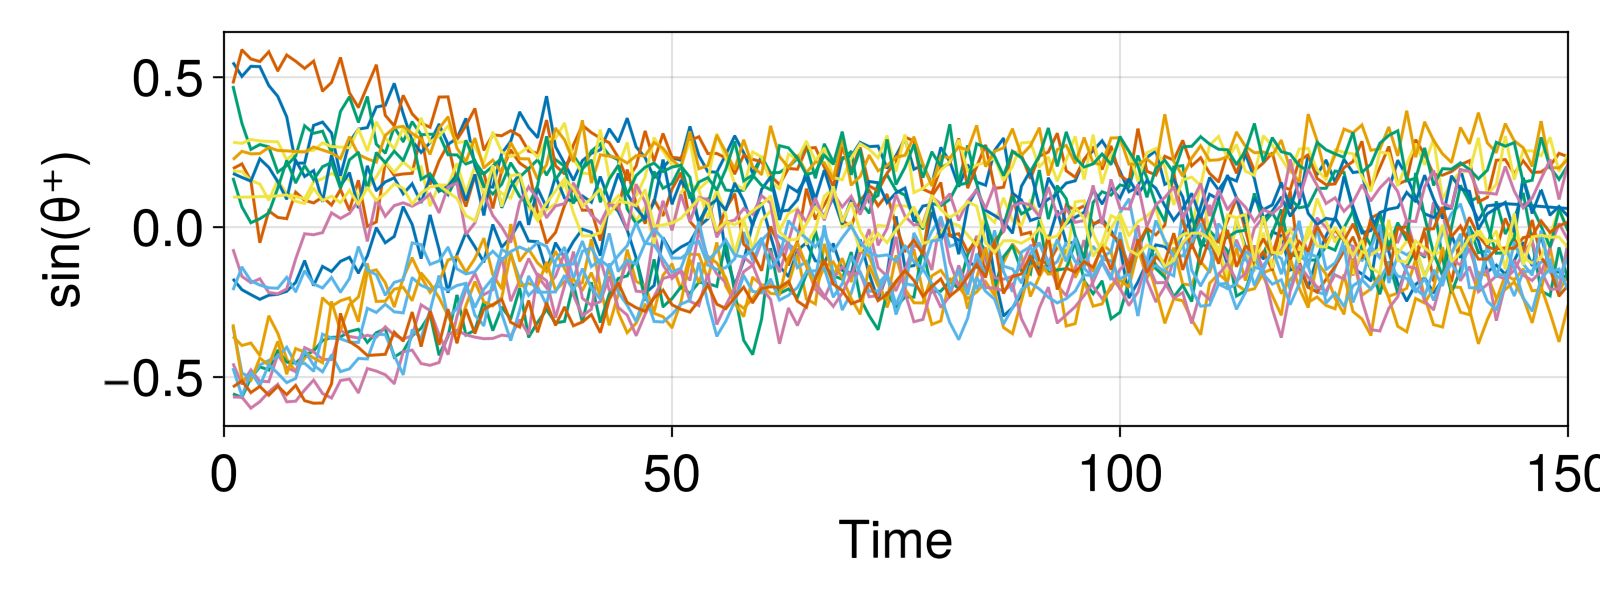

In [10]:
f = Figure(resolution = (800, 300), fontsize = 26, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "sin(θ⁺)"
    )

# ep1 = 1
# ep2 = 30

ep1 = 180
ep2 = 200

for ep in collect(ep1:ep2)
    Makie.lines!([sin(hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation)  for t in 1:(length(hookResults[ep].agentHandlerList)-1)])# , color = :black)
    #Makie.lines!([hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation  for t in 1:(length(hookResults[ep].agentHandlerList)-1)])# , color = :black)
    #Makie.lines!(FVF([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[2]  for t in 1:(length(hookResults[ep].agentHandlerList)-1)]))# , color = :black)

end
Makie.xlims!(0,150)
#Makie.ylims!(-0.6, 0.6)



# figurePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Figures/"
# save(figurePath * "HybridOrientationRandom.png", f, px_per_unit = 3)

current_figure()

In [74]:
hookResults[200].agentHandlerList[1].PlusDefects[1].activityCoefficients.c0

-10.0

In [36]:
sin(-pi)

-1.2246467991473532e-16

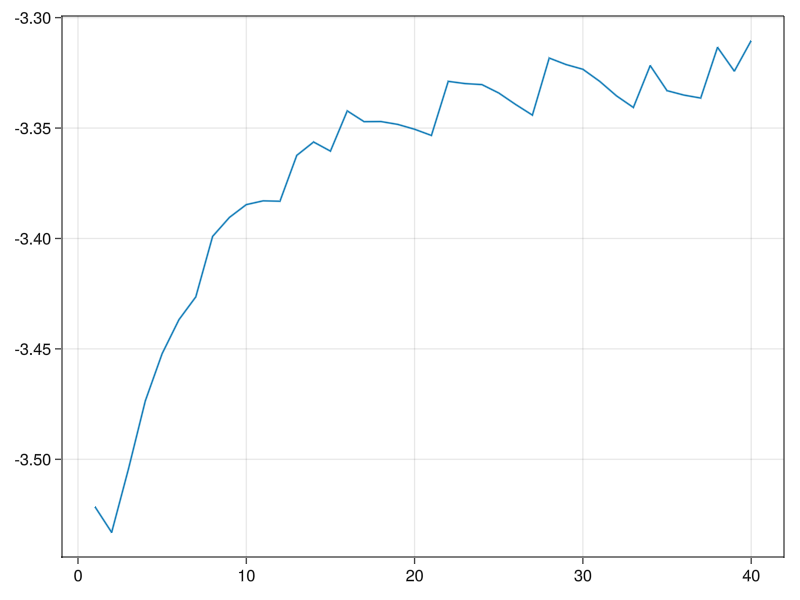

In [19]:
ep = 180
Makie.lines([hookResults[ep].agentHandlerList[t].PlusDefects[1].activityCoefficients.c0 for t in 1:40])

In [28]:
using CairoMakie

f = Figure(resolution = (800, 600), fontsize = 18, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "x Position",
    xgridvisible = false,
    ygridvisible = false)

ep1 = 10
ep2 = 20

lw = 2

CairoMakie.lines!(ax, [hookResults[ep1].agentHandlerList[t].PlusDefects[1].Position[1] for t in 1:(length(hookResults[ep1].agentHandlerList)-1)] , 
    color = :red, linestyle = "--", linewidth = lw, label = "(+) defect (random)")
CairoMakie.lines!(ax, [hookResults[ep1].agentHandlerList[t].MinusDefects[1].Position[1] for t in 1:(length(hookResults[ep1].agentHandlerList)-1)] , 
    color = :red, linewidth = lw, label = "(−) defect (random)")


CairoMakie.lines!(ax, [hookResults[ep2].agentHandlerList[t].PlusDefects[1].Position[1] for t in 1:(length(hookResults[ep2].agentHandlerList)-1)] , 
    color = :black, linestyle = "--", linewidth = lw, label = "(+) defect (trained)")
CairoMakie.lines!(ax, [hookResults[ep2].agentHandlerList[t].MinusDefects[1].Position[1] for t in 1:(length(hookResults[ep2].agentHandlerList)-1)] , 
    color = :black, linewidth = lw, label = "(−) defect (trained)")

Makie.ylims!(ax, (0, 200))
axislegend(position = :lt)


bb = [550, 750, 125, 275] 
ax2 = Axis(f, bbox = inset=BBox(bb[1], bb[2], bb[3], bb[4]),
    xlabel = "Time",
    ylabel = "Separation",
    xgridvisible = false,
    ygridvisible = false,
    backgroundcolor = :white
)


#translate!(ax2.blockscene, 0, 0, 1000)

Makie.lines!(ax2, [hookResults[ep1].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep1].agentHandlerList[t].MinusDefects[1].Position[1]
        for t in 1:(length(hookResults[ep1].agentHandlerList)-1)] , color = :red, linewidth = lw)

Makie.lines!(ax2, [hookResults[ep2].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep2].agentHandlerList[t].MinusDefects[1].Position[1]
        for t in 1:(length(hookResults[ep2].agentHandlerList)-1)] , color = :black, linewidth = lw)

Makie.ylims!(ax2, (0, 100))


# figurePath = "/Users/csfloyd/Dropbox/Projects/RLNematic/Figures/"
# save(figurePath * "HybridSeparation.png", f, px_per_unit = 3)

current_figure()

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie ~/.julia/packages/Makie/iRM0c/src/scenes.jl:220


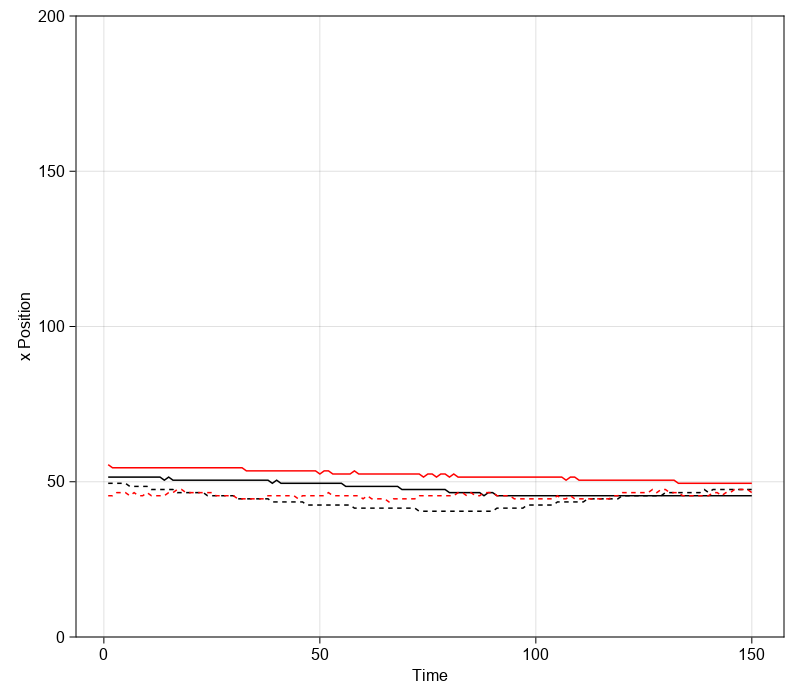

In [25]:
f = Figure(resolution = (800, 700), fontsize = 16, font = "Arial", dpi = 300)
ax = Axis(f[1, 1],
    xlabel = "Time",
    ylabel = "x Position")

ep = 109

Makie.lines!(ax, [hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[2] for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :black, linestyle = "--")
Makie.lines!(ax, [hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[2] for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :black)

ep = 5
Makie.lines!(ax, [hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[2] for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :red, linestyle = "--")
Makie.lines!(ax, [hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[2] for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :red)





Makie.ylims!(0,200)
current_figure()


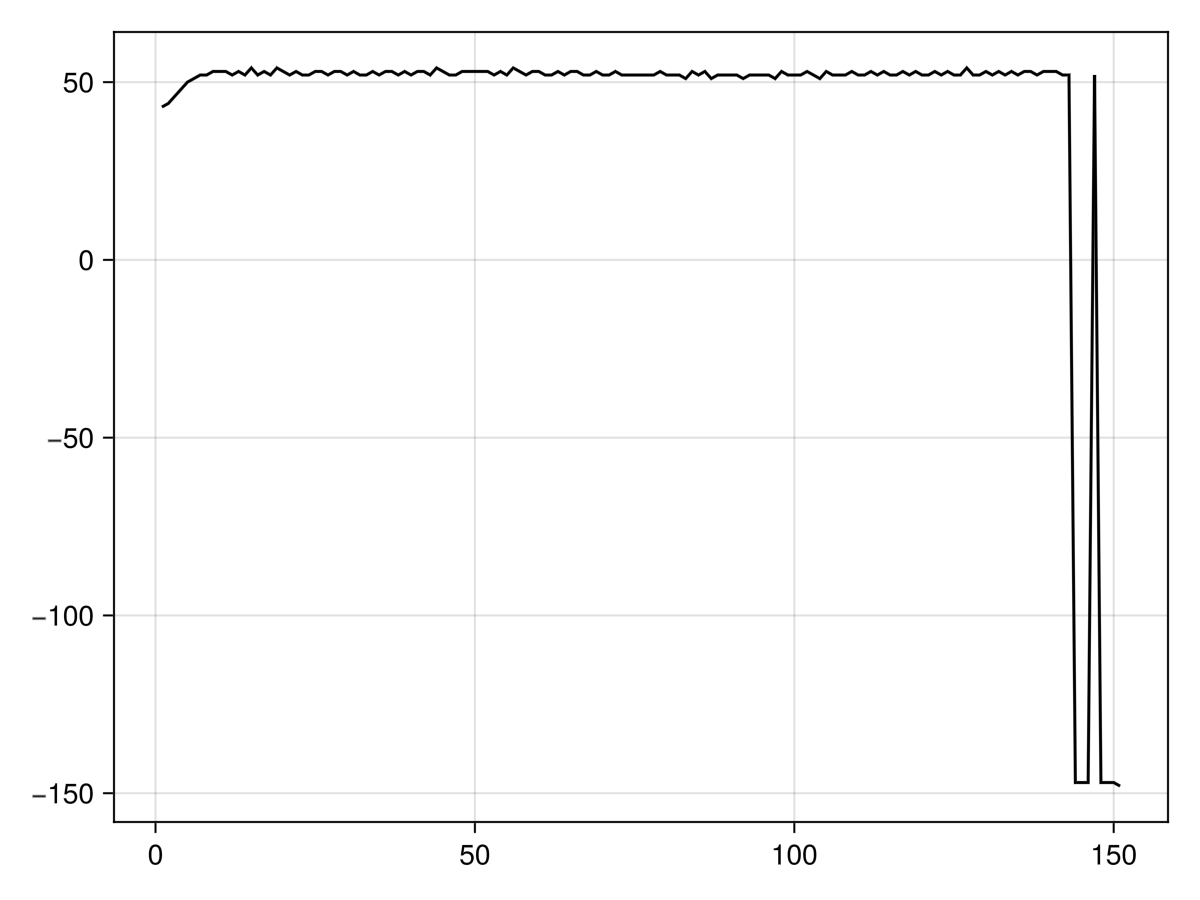

In [7]:
ep = 120
orList = []
sepList = []
for t in 1:length(hookResults[ep].agentHandlerList)
    if (length(hookResults[ep].agentHandlerList[t].PlusDefects)==1) && (length(hookResults[ep].agentHandlerList[t].MinusDefects)==1)  
        push!(orList, sin(hookResults[ep].agentHandlerList[t].PlusDefects[1].Orientation[1]))
        push!(sepList, hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1])
    end
end
#Makie.lines(orList , color = :black)
Makie.lines(FVF(sepList) , color = :black)



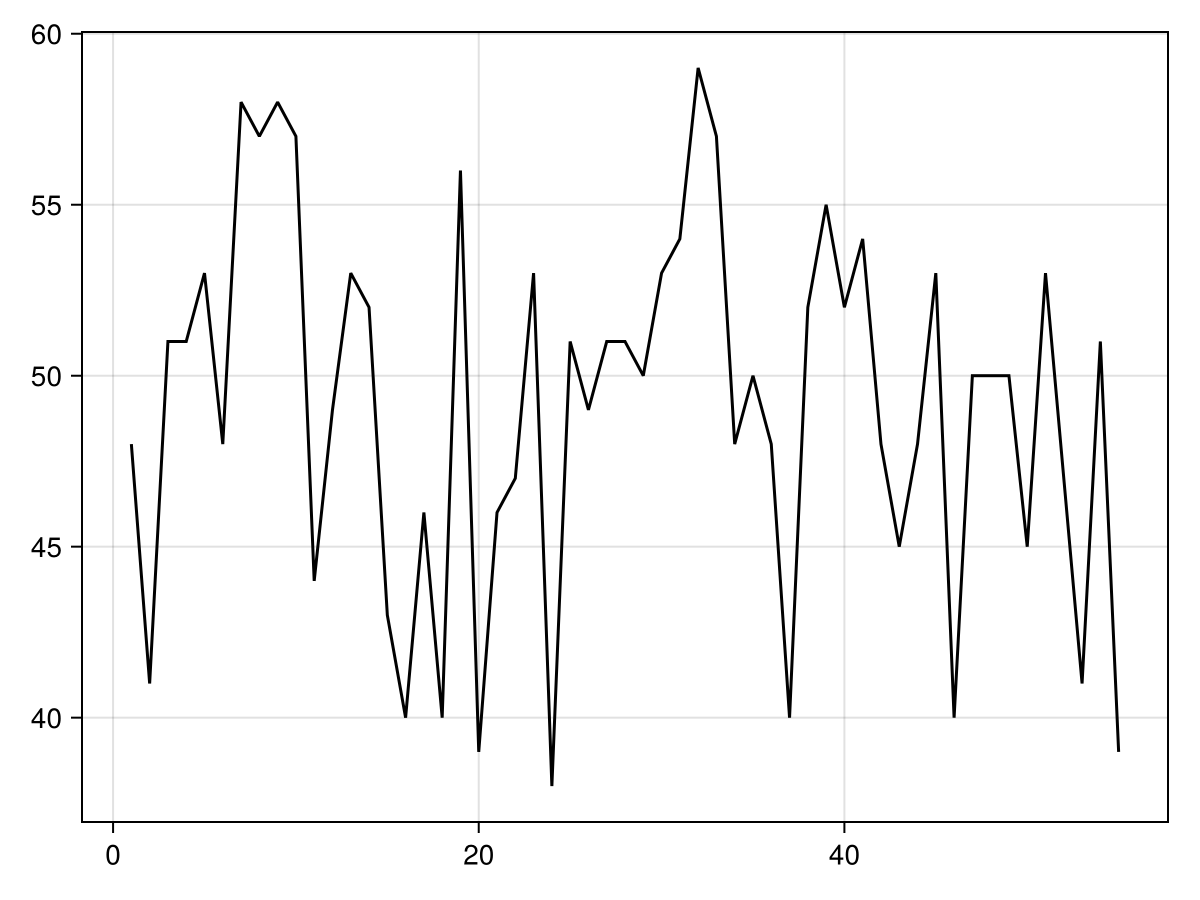

In [21]:
Makie.lines([hookResults[ep].agentHandlerList[1].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[1].MinusDefects[1].Position[1]
        for ep in 1:(length(hookResults)-1)] , color = :black)
Makie.lines([hookResults[ep].agentHandlerList[1].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[1].MinusDefects[1].Position[1]
        for ep in 1:(length(hookResults)-1)] , color = :black)


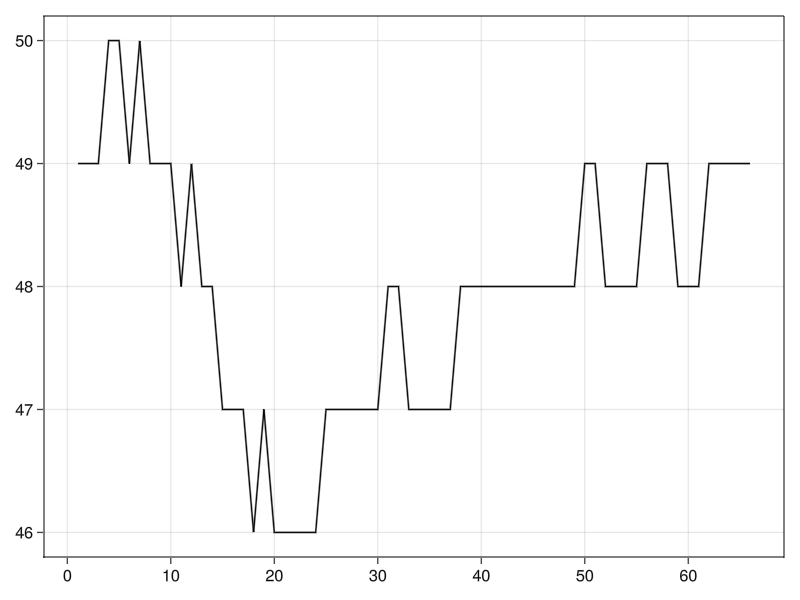

In [53]:
ep = 119

Makie.lines([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1]
        for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :black)
# Makie.lines!([hookResults[ep].agentHandlerList[t].MinusDefects[1].activityCoefficients.r0x - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1]
#         for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :black, linestyle = "--")
#println(hookResults[ep].agentHandlerList[end].MinusDefects[1].activityCoefficients.r0x - hookResults[ep].agentHandlerList[end].MinusDefects[1].Position[1])

#Makie.ylims!(0,60
# ep = 23
# Makie.lines!([hookResults[ep].agentHandlerList[t].PlusDefects[1].Position[1] - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1]
#         for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :red)
# Makie.lines!([hookResults[ep].agentHandlerList[t].MinusDefects[1].activityCoefficients.r0x - hookResults[ep].agentHandlerList[t].MinusDefects[1].Position[1]
#         for t in 1:(length(hookResults[ep].agentHandlerList)-1)] , color = :red, linestyle = "--")
current_figure()

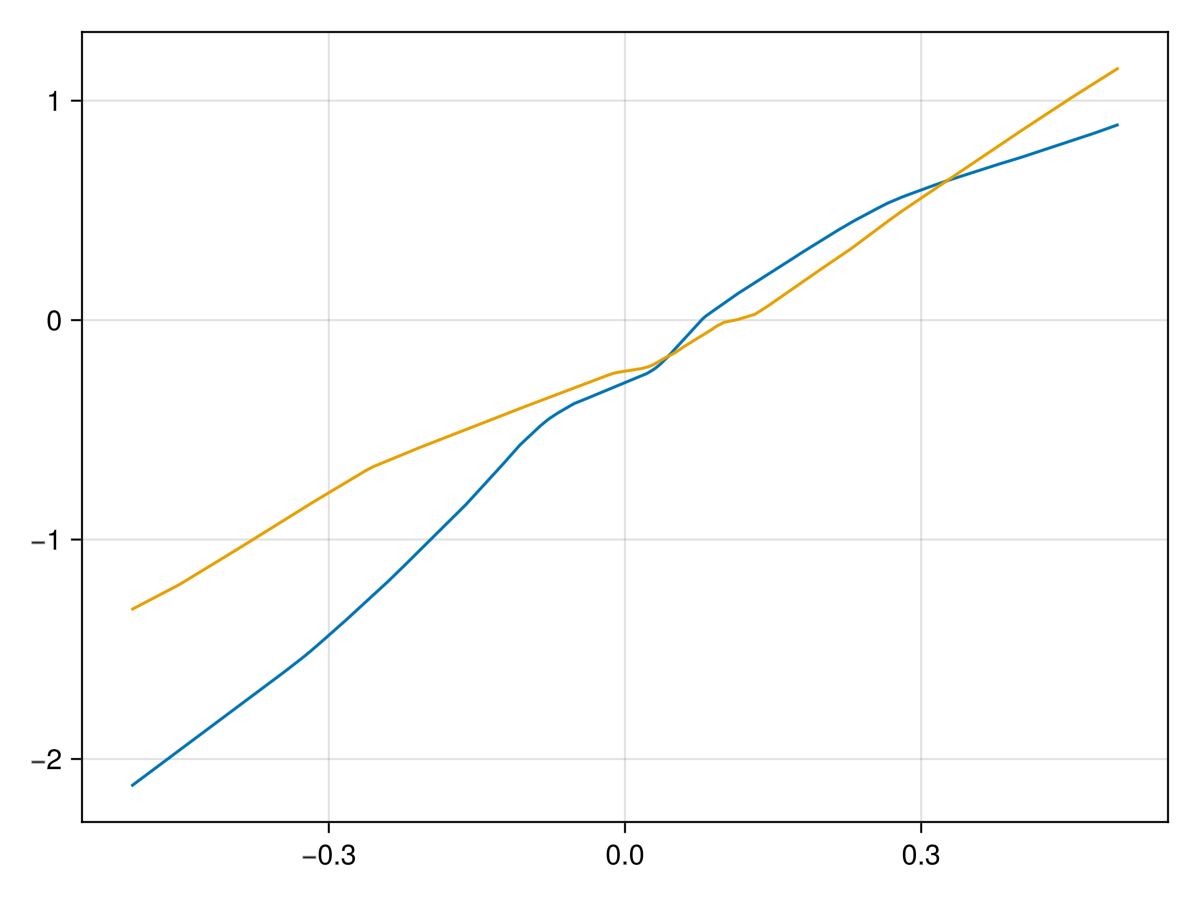

In [96]:
targetActions = []
behaviorActions = []

ps = collect(-0.5:0.001:0.5)

for p in ps
#     targetAction = ex.policy.policy.target_actor.model([0, p])[3]
#     behaviorAction = ex.policy.policy.behavior_actor.model([0, p])[3]
    
    targetAction = ex.policy.policy.target_actor.model([p])[1]
    behaviorAction = ex.policy.policy.behavior_actor.model([p])[1]
    
    push!(targetActions, targetAction[1])
    push!(behaviorActions, behaviorAction[1])
end

#Makie.lines(ps, Vector{Float64}(targetActions))
Makie.lines(ps, Vector{Float64}(behaviorActions))
Makie.lines!(ps, p1)

current_figure()

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(1 => 32, relu)  # 64 parameters
│   summary(x) = "1-element Vector{Float64}"
└ @ Flux ~/.julia/packages/Flux/MtsAN/src/layers/stateless.jl:60


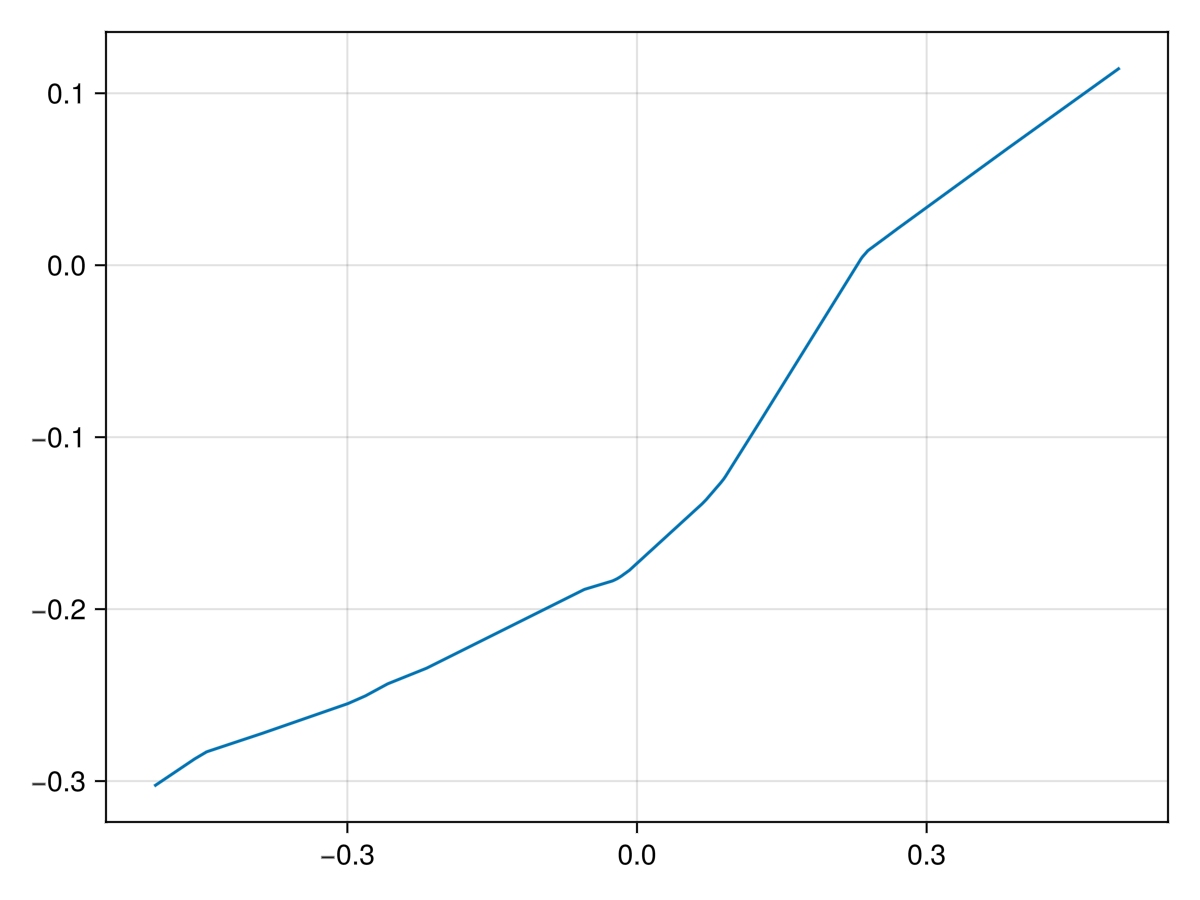

In [44]:
targetActions = []
behaviorActions = []

ps = collect(-0.5:0.001:0.5)

for p in ps
#     targetAction = ex.policy.policy.target_actor.model([0, p])[3]
#     behaviorAction = ex.policy.policy.behavior_actor.model([0, p])[3]
    
    targetAction = ex.policy.policy.target_actor.model([p])[1]
    behaviorAction = ex.policy.policy.behavior_actor.model([p])[1]
    
    push!(targetActions, targetAction[1])
    push!(behaviorActions, behaviorAction[1])
end

#Makie.lines(ps, Vector{Float64}(targetActions))
Makie.lines(ps, - Vector{Float64}(behaviorActions))

p1 = - Vector{Float64}(behaviorActions)
current_figure()

In [569]:
targetActions = []
behaviorActions = []

ps = collect(-1:0.1:1)

for p in ps
    targetAction = ex.policy.policy.target_actor.model([0, p])[2]
    behaviorAction = ex.policy.policy.behavior_actor.model([0, p])[2]
    push!(targetActions, targetAction[1])
    push!(behaviorActions, behaviorAction[1])
end

Makie.lines(ps, Vector{Float64}(targetActions))

current_figure()

LoadError: DimensionMismatch: matrix A has dimensions (32,1), vector B has length 2